In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
from math import sqrt
import math
import datetime
from datetime import timedelta
import plotly.express as px

#############
#Time variables
#############
year=int(datetime.datetime.today().year)
month=int(datetime.datetime.today().month)
print("Current year is: %d"%(year))
print("Current month is: %d"%(month))

Current year is: 2022
Current month is: 7


In [157]:
df=pd.read_csv("HRDataset_v14.csv")
df.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
1      Simon Roup        4.0            Indeed      Fully Meets   
2  Kissy Sullivan       20.0          LinkedIn      Fully Meets   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
4  Webster Butler       39.0     Google Search      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60               5                    0   
1              4.96               3                    6   
2              3.02               3                    0   
3              4.84               5                    0   
4              5.00               4                    0   

  LastPerformanceReview_Date DaysLateLast30 Absences  
0                  1/17/2019              0        1  
1                  2/24/2016              0       17  
2                  5/15/2012              0        3  
3                   1/3/2019              0       15  
4                   2/1/2016              0        2  

[5 rows x 36 columns]

In [158]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

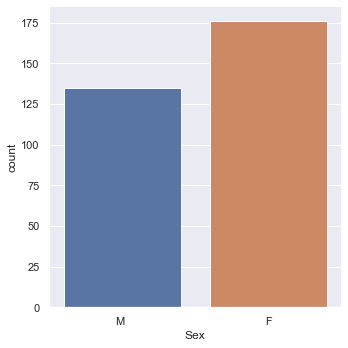

In [159]:
sns.set(rc={"figure.figsize":(15,10)})
sns.catplot(x="Sex",kind="count",data=df)

([<matplotlib.patches.Wedge at 0x2b2b5795070>,
 [Text(-0.22616621333018427, 1.0764984179959978, 'F'),
  Text(0.22616631411923893, -1.076498396820784, 'M ')],
 [Text(-0.1233633890891914, 0.5871809552705441, '57%'),
  Text(0.12336344406503941, -0.5871809437204275, '43%')])

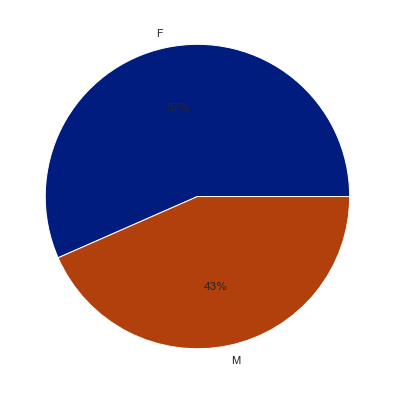

In [160]:
b=df.groupby("Sex")["Sex"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

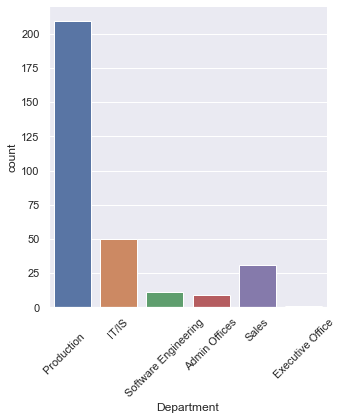

In [161]:
sns.catplot(x="Department",kind="count",data=df)
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x2b2ba083040>,
 [Text(1.095457159324756, 0.0998679732653877, 'Admin Offices'),
  Text(1.0798016797695331, 0.20982929339559558, 'Executive Office'),
  Text(0.8362661398362403, 0.7146040465624262, 'IT/IS'),
  Text(-1.0818661575191004, -0.19891107866294735, 'Production       '),
  Text(0.9460801242828972, -0.5611883805255219, 'Sales'),
  Text(1.0932160973333793, -0.1219777214542706, 'Software Engineering')],
 [Text(0.5975220869044123, 0.054473439962938734, '3%'),
  Text(0.5889827344197452, 0.11445234185214304, '0%'),
  Text(0.4561451671834037, 0.3897840253976869, '16%'),
  Text(-0.5901088131922365, -0.10849695199797127, '67%'),
  Text(0.5160437041543076, -0.30610275301392104, '10%'),
  Text(0.5962996894545705, -0.06653330261142032, '4%')])

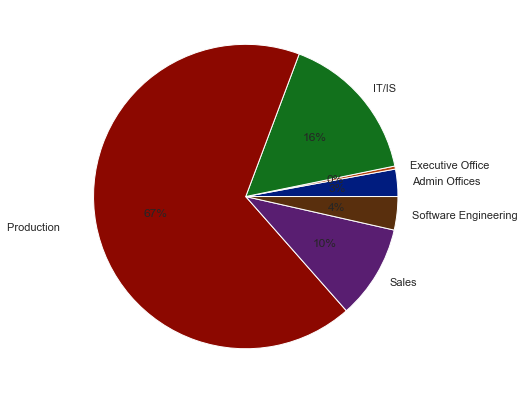

In [162]:
b=df.groupby("Department")["Department"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Exceeds'),
  Text(1, 0, 'Fully Meets'),
  Text(2, 0, 'Needs Improvement'),
  Text(3, 0, 'PIP')])

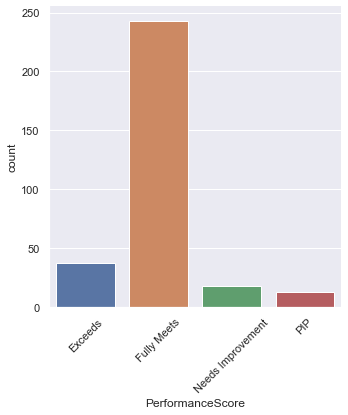

In [163]:
sns.catplot(x="PerformanceScore",kind="count",data=df)
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x2b2b7211e50>,
 [Text(1.0240577459139202, 0.40162884985232433, 'Exceeds'),
  Text(-1.097980182975297, -0.06662970653945087, 'Fully Meets'),
  Text(0.993122733496463, -0.4729769933226281, 'Needs Improvement'),
  Text(1.0905288316440482, -0.14403772892220723, 'PIP')],
 [Text(0.5585769523166837, 0.21907028173763143, '12%'),
  Text(-0.5988982816228893, -0.036343476294245926, '78%'),
  Text(0.5417033091798888, -0.25798745090325165, '6%'),
  Text(0.5948339081694808, -0.07856603395756757, '4%')])

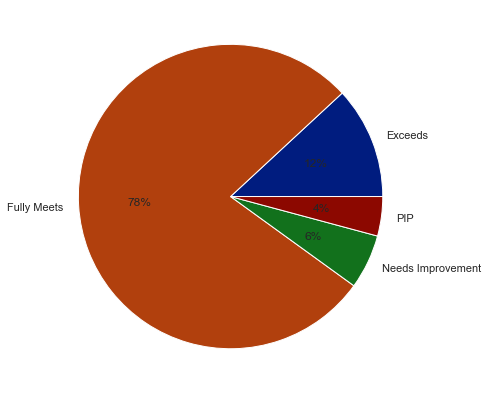

In [164]:
b=df.groupby("PerformanceScore")["PerformanceScore"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Two or more races'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'American Indian or Alaska Native'),
  Text(5, 0, 'Hispanic')])

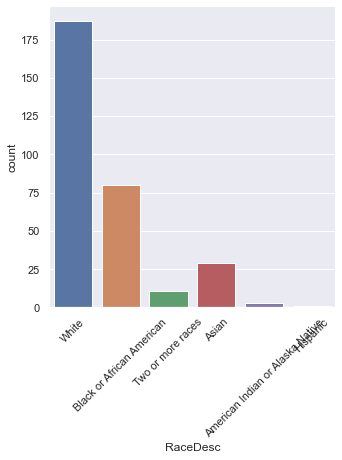

In [165]:
sns.catplot(x="RaceDesc",kind="count",data=df)
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x2b2b59668e0>,
 [Text(1.0994949307663207, 0.03333012479970707, 'American Indian or Alaska Native'),
  Text(1.031962391228446, 0.3808590593514455, 'Asian'),
  Text(0.1274978610884168, 1.0925860585866356, 'Black or African American'),
  Text(-0.7103711211735867, 0.8398647928104747, 'Hispanic'),
  Text(-0.806716831526064, 0.7478020819257916, 'Two or more races'),
  Text(-0.3441431118749342, -1.0447801292851222, 'White')],
 [Text(0.5997245076907203, 0.018180068072567487, '1%'),
  Text(0.5628885770336978, 0.20774130510078845, '9%'),
  Text(0.06954428786640915, 0.5959560319563466, '26%'),
  Text(-0.3874751570037745, 0.4581080688057134, '0%'),
  Text(-0.4400273626505803, 0.40789204468679535, '4%'),
  Text(-0.187714424659055, -0.5698800705191576, '60%')])

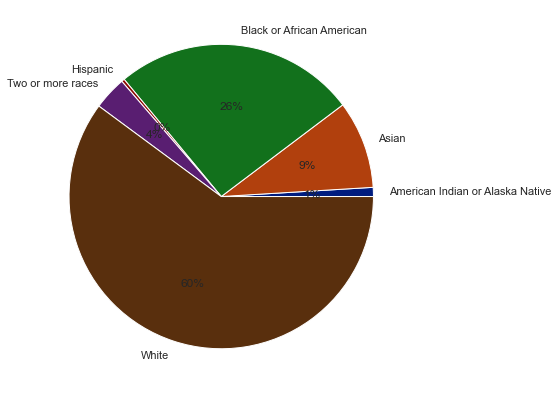

In [166]:
b=df.groupby("RaceDesc")["RaceDesc"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")

In [167]:
#Performance score in terms of each department
fig=px.bar(df,x="Department",color="PerformanceScore")
fig.show()

In [168]:
#Sex in terms of each department
fig=px.bar(df,x="Department",color="Sex")
fig.show()

In [169]:
#Race in terms of each department
fig=px.bar(df,x="Department",color="RaceDesc")
fig.show()

Text(0.5, 1.0, 'Average satisfaction by performance')

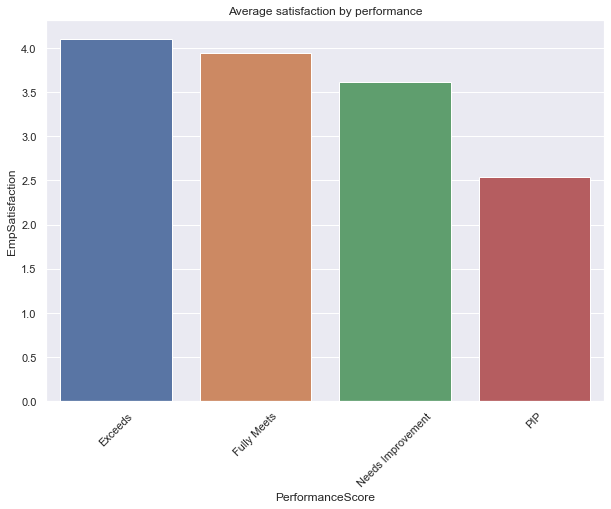

In [170]:
b=df.groupby("PerformanceScore")["EmpSatisfaction"].mean().reset_index()
#The more satisfied the employee is, the better the performance
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="PerformanceScore",y="EmpSatisfaction",data=b)
plt.xticks(rotation=45)
plt.title("Average satisfaction by performance")

Text(0.5, 1.0, 'Average satisfaction by department')

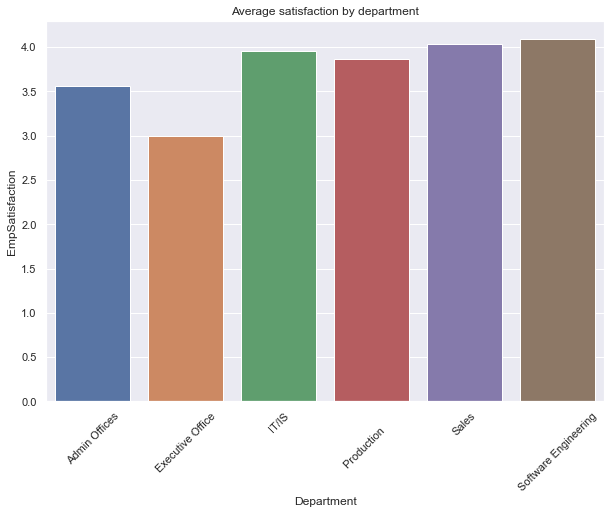

In [171]:
#Satisfaction by department
b=df.groupby("Department")["EmpSatisfaction"].mean().reset_index()
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="Department",y="EmpSatisfaction",data=b)
plt.xticks(rotation=45)
plt.title("Average satisfaction by department")

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='Salary'>

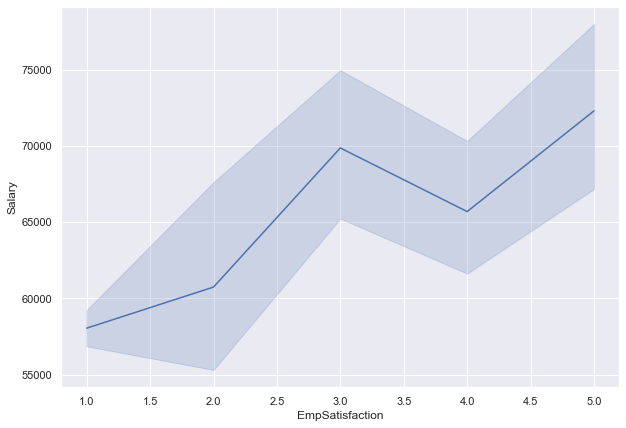

In [172]:
#Higher satisfaction for higher salaries.
sns.set(rc={"figure.figsize":(10,7)})
sns.lineplot(x="EmpSatisfaction",y="Salary",data=df)

Text(0.5, 1.0, 'Average salary by department')

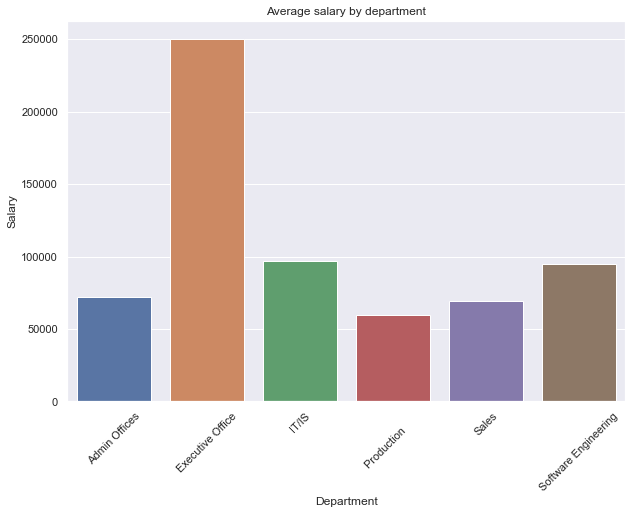

In [173]:
b=df.groupby("Department")["Salary"].mean().reset_index()
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="Department",y="Salary",data=b)
plt.xticks(rotation=45)
plt.title("Average salary by department")

<AxesSubplot:>

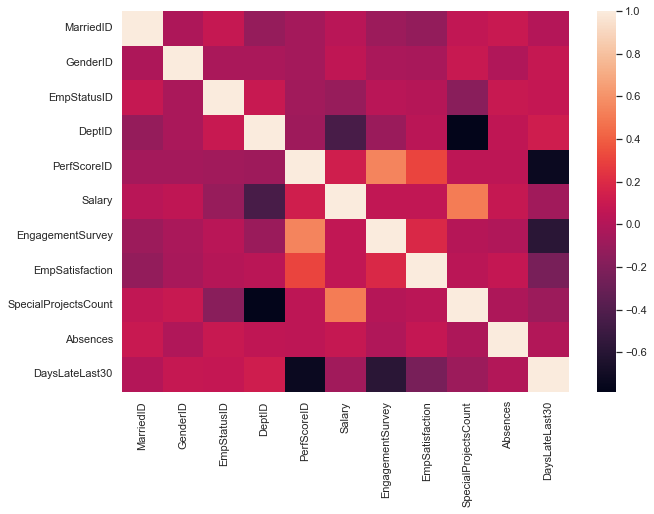

In [174]:
df_num=df[["MarriedID","GenderID","EmpStatusID","DeptID","PerfScoreID","Salary","EngagementSurvey","EmpSatisfaction",
          "SpecialProjectsCount","Absences","DaysLateLast30"]]
#Shows for example that performance score is inversely correlated with number of days late in the last 30 (as we expected).
sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(df_num.corr())

In [175]:
################
#EDA similar to website: https://www.humano.ro/hr-data-management-and-visualization-powerful-insights/
###############
#Demographics EDA

df=pd.read_csv("HRDataset_v14.csv")
df.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
1      Simon Roup        4.0            Indeed      Fully Meets   
2  Kissy Sullivan       20.0          LinkedIn      Fully Meets   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
4  Webster Butler       39.0     Google Search      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60               5                    0   
1              4.96               3                    6   
2              3.02               3                    0   
3              4.84               5                    0   
4              5.00               4                    0   

  LastPerformanceReview_Date DaysLateLast30 Absences  
0                  1/17/2019              0        1  
1                  2/24/2016              0       17  
2                  5/15/2012              0        3  
3                   1/3/2019              0       15  
4                   2/1/2016              0        2  

[5 rows x 36 columns]

In [176]:
n_rows=df.shape[0]
print("Total number of people on record in the HR database is: %d"%(n_rows))
n_terminated=len([x for x in df["DateofTermination"] if pd.isna(x)==False])
print("Departed so far: %d"%(n_terminated))
print("Us today: %d"%(n_rows-n_terminated))

Total number of people on record in the HR database is: 311
Departed so far: 104
Us today: 207


In [177]:
#We need to decide on the bottons on the top bar. THis will depend on the variables you have in the dataset. 
#Once we have the buttons on the top bar, we can subset the dataset in the following way:
sub_df=df[df["Department"]=="Production       "]
sub_df=sub_df[sub_df["EmploymentStatus"]=="Active"]
sub_df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0     Adinolfi, Wilson  K  10026          0                0         1   
3            Alagbe,Trina  10088          1                1         0   
5       Anderson, Linda    10002          0                0         0   
7             Athwal, Sam  10062          0                4         1   
8        Bachiochi, Linda  10114          0                0         0   
..                    ...    ...        ...              ...       ...   
294  Von Massenbach, Anna  10183          0                0         0   
295         Walker, Roger  10190          0                0         1   
305         Wolk, Hang  T  10174          0                0         0   
306        Woodson, Jason  10135          0                0         1   
310         Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0              1       5            4                       0   62506  ...   
3              1       5            3                       0   64991  ...   
5              1       5            4                       0   57568  ...   
7              1       5            3                       0   59365  ...   
8              3       5            3                       1   47837  ...   
..           ...     ...          ...                     ...     ...  ...   
294            2       5            3                       0   62068  ...   
295            1       5            3                       0   66541  ...   
305            1       5            3                       0   60446  ...   
306            1       5            3                       0   65893  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID   RecruitmentSource PerformanceScore  \
0    Michael Albert       22.0            LinkedIn          Exceeds   
3      Elijiah Gray       16.0              Indeed      Fully Meets   
5          Amy Dunn       11.0            LinkedIn          Exceeds   
7     Ketsia Liebig       19.0   Employee Referral      Fully Meets   
8    Brannon Miller       12.0  Diversity Job Fair      Fully Meets   
..              ...        ...                 ...              ...   
294  Michael Albert       22.0            LinkedIn      Fully Meets   
295   Ketsia Liebig       19.0   Employee Referral      Fully Meets   
305   David Stanley       14.0            LinkedIn      Fully Meets   
306  Kissy Sullivan       20.0            LinkedIn      Fully Meets   
310   David Stanley       14.0            LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0                4.60               5                    0   
3                4.84               5                    0   
5                5.00               5                    0   
7                5.00               4                    0   
8                4.46               3                    0   
..                ...             ...                  ...   
294              3.21               3                    0   
295              3.11               5                    0   
305              3.40               4                    0   
306              4.07               4                    0   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
0                    1/17/2019              0        1  
3                     1/3/2019              0       15  
5                     1/7/2019              0       15  
7                    2/25/2019              0       19  
8                    1/25/2019              0        4  
..                         ...            ...      ...  
294                  1/29/2019              0        7  
295                  2/12/2019              0        4  
305                  2/21/2019              0       14  
306               

In [178]:
#Now, let me try to do the EDA on the whole dataset (it will be the same on the subset of the data created by the 
#choices that the user makes from the buttons on the top bar). 

############
#Active demographics
###########

#Will need a dataset that counts the number of employees active/newly hired in each month from the beginning of the company
demo_df=pd.DataFrame()

#function to find the first date of hiring in dataset. Returns a list on the first entry is the month and second is the year
def first_date_of_hire(column):
    year=int(datetime.datetime.today().year)
    month=12
    for date in column:
        current_month=int(date.split("/")[1])
        current_year=int(date.split("/")[2])
        if current_year<year:
            year=current_year
            month=current_month
        if current_year==year and current_month<month:
            month=current_month
            
    return [month,year]

print(first_date_of_hire(df["DateofHire"]))

[9, 2006]


In [179]:
#Function that creates consecutive months and years from the first date (the output of the function first_date_of_hire)

def create_dates(first_date):
    dates=[]
    first_month=first_date[0]
    first_year=first_date[1]
    year=int(datetime.datetime.today().year)
    month=int(datetime.datetime.today().month)
    current_year=first_year
    current_month=first_month
    while current_year<=year:
        if current_month==13:
            current_month=1
            current_year+=1
        if current_month<=12:
            current_date=str(current_month)+"/1/"+str(current_year)
            dates.append(current_date)
            current_month+=1
        if current_year==year and current_month>month:
            break
    return dates

print(create_dates(first_date_of_hire(df["DateofHire"])))

['9/1/2006', '10/1/2006', '11/1/2006', '12/1/2006', '1/1/2007', '2/1/2007', '3/1/2007', '4/1/2007', '5/1/2007', '6/1/2007', '7/1/2007', '8/1/2007', '9/1/2007', '10/1/2007', '11/1/2007', '12/1/2007', '1/1/2008', '2/1/2008', '3/1/2008', '4/1/2008', '5/1/2008', '6/1/2008', '7/1/2008', '8/1/2008', '9/1/2008', '10/1/2008', '11/1/2008', '12/1/2008', '1/1/2009', '2/1/2009', '3/1/2009', '4/1/2009', '5/1/2009', '6/1/2009', '7/1/2009', '8/1/2009', '9/1/2009', '10/1/2009', '11/1/2009', '12/1/2009', '1/1/2010', '2/1/2010', '3/1/2010', '4/1/2010', '5/1/2010', '6/1/2010', '7/1/2010', '8/1/2010', '9/1/2010', '10/1/2010', '11/1/2010', '12/1/2010', '1/1/2011', '2/1/2011', '3/1/2011', '4/1/2011', '5/1/2011', '6/1/2011', '7/1/2011', '8/1/2011', '9/1/2011', '10/1/2011', '11/1/2011', '12/1/2011', '1/1/2012', '2/1/2012', '3/1/2012', '4/1/2012', '5/1/2012', '6/1/2012', '7/1/2012', '8/1/2012', '9/1/2012', '10/1/2012', '11/1/2012', '12/1/2012', '1/1/2013', '2/1/2013', '3/1/2013', '4/1/2013', '5/1/2013', '6/1/2

In [180]:
#Function that takes as input the output of create_dates
#-counts the number of active employees before each date,
#-counts the number of active F and M before each date 
#-counts the number of active in each department before each date
#-counts the number of active in each race before each date

def counts_before_dates(dates):
    #dates=create_dates(first_date_of_hire(df["DateofHire"]))
    count_active=[]
    count_left=[]

    count_active_F=[]
    count_active_M=[]    #will be count_active-count_active_F
    count_left_F=[]
    count_left_M=[]    #will be count_left-count_left_F

    count_active_production=[]
    count_active_admin=[]
    count_active_it=[]
    count_active_software=[]
    count_active_sales=[]
    count_active_exec=[]      #will be count_active-sum of counts active from the other departments
    count_left_production=[]
    count_left_admin=[]
    count_left_it=[]
    count_left_software=[]
    count_left_sales=[]
    count_left_exec=[]      #will be count_left-sum of counts left from the other departments

    count_active_hispanic=[]
    count_active_asian=[]
    count_active_alaska=[]
    count_active_2=[]
    count_active_white=[]
    count_active_black=[]      #will be count_active-sum of counts active from the other races
    count_left_hispanic=[]
    count_left_asian=[]
    count_left_alaska=[]
    count_left_2=[]
    count_left_white=[]
    count_left_black=[]      #will be count_left-sum of counts left from the other races

    #take each consecutive month
    for date in dates:
        current_count_active=0
        current_count_left=0
        
        current_count_active_F=0
        current_count_left_F=0
    
        current_count_active_production=0
        current_count_active_admin=0
        current_count_active_it=0
        current_count_active_software=0
        current_count_active_sales=0
        current_count_left_production=0
        current_count_left_admin=0
        current_count_left_it=0
        current_count_left_software=0
        current_count_left_sales=0
    
        current_count_active_hispanic=0
        current_count_active_asian=0
        current_count_active_alaska=0
        current_count_active_2=0
        current_count_active_white=0
        current_count_left_hispanic=0
        current_count_left_asian=0
        current_count_left_alaska=0
        current_count_left_2=0
        current_count_left_white=0
    
        current_month=int(date.split("/")[0])
        current_year=int(date.split("/")[2])
    
        #take each hire date in the database
        for i, hire_date in enumerate(df["DateofHire"]):
            hire_month=int(hire_date.split("/")[0])
            hire_year=int(hire_date.split("/")[2])
        
            #if that person was fired
            if pd.isna(df["DateofTermination"].iloc[i])==False:
                termination_date=df["DateofTermination"].iloc[i]
                termination_month=int(termination_date.split("/")[0])
                termination_year=int(termination_date.split("/")[2])
            
                #if the person was fired before the current date form the consecutive dates list, I need to decrease all counts by 1
                if hire_month<=current_month and hire_year<=current_year and termination_month<=current_month and termination_year<=current_year:
                    current_count_active-=1
                    current_count_left+=1
                    if df["Sex"].iloc[i]=="F":
                        current_count_active_F-=1
                        current_count_left_F+=1
            
                    if df["Department"].iloc[i]=="Production       ":
                        current_count_active_production-=1 
                        current_count_left_production+=1
                    if df["Department"].iloc[i]=="Admin Offices":
                        current_count_active_admin-=1
                        current_count_left_admin+=1
                    if df["Department"].iloc[i]=="IT/IS":
                        current_count_active_it-=1
                        current_count_left_it+=1
                    if df["Department"].iloc[i]=="Software Engineering":
                        current_count_active_software-=1
                        current_count_left_software+=1
                    if df["Department"].iloc[i]=="Sales":
                        current_count_active_sales-=1
                        current_count_left_sales+=1
            
                    if df["RaceDesc"].iloc[i]=="Hispanic":
                        current_count_active_hispanic-=1
                        current_count_left_hispanic+=1
                    if df["RaceDesc"].iloc[i]=="Asian":
                        current_count_active_asian-=1
                        current_count_left_asian+=1
                    if df["RaceDesc"].iloc[i]=="American Indian or Alaska Native":
                        current_count_active_alaska-=1
                        current_count_left_alaska+=1
                    if df["RaceDesc"].iloc[i]=="Two or more races":
                        current_count_active_2-=1
                        current_count_left_2+=1
                    if df["RaceDesc"].iloc[i]=="White":
                        current_count_active_white-=1
                        current_count_left_white+=1
            
                #if that person was fired after the current date from the consecutive dates list, I need to increase all counts by 1
                if hire_month<=current_month and hire_year<=current_year and termination_month>current_month and termination_year>current_year:
                    current_count_active+=1
                    if df["Sex"].iloc[i]=="F":
                        current_count_active_F+=1
            
                    if df["Department"].iloc[i]=="Production       ":
                        current_count_active_production+=1    
                    if df["Department"].iloc[i]=="Admin Offices":
                        current_count_active_admin+=1
                    if df["Department"].iloc[i]=="IT/IS":
                        current_count_active_it+=1
                    if df["Department"].iloc[i]=="Software Engineering":
                        current_count_active_software+=1
                    if df["Department"].iloc[i]=="Sales":
                        current_count_active_sales+=1
            
                    if df["RaceDesc"].iloc[i]=="Hispanic":
                        current_count_active_hispanic+=1
                    if df["RaceDesc"].iloc[i]=="Asian":
                        current_count_active_asian+=1
                    if df["RaceDesc"].iloc[i]=="American Indian or Alaska Native":
                        current_count_active_alaska+=1
                    if df["RaceDesc"].iloc[i]=="Two or more races":
                        current_count_active_2+=1
                    if df["RaceDesc"].iloc[i]=="White":
                        current_count_active_white+=1
        
            #if that person was never fired, I need to increase all counts by 1.
            else:
                if hire_month<=current_month and hire_year<=current_year:
                    current_count_active+=1
                    if df["Sex"].iloc[i]=="F":
                        current_count_active_F+=1
            
                    if df["Department"].iloc[i]=="Production       ":
                        current_count_active_production+=1    
                    if df["Department"].iloc[i]=="Admin Offices":
                        current_count_active_admin+=1
                    if df["Department"].iloc[i]=="IT/IS":
                        current_count_active_it+=1
                    if df["Department"].iloc[i]=="Software Engineering":
                        current_count_active_software+=1
                    if df["Department"].iloc[i]=="Sales":
                        current_count_active_sales+=1
            
                    if df["RaceDesc"].iloc[i]=="Hispanic":
                        current_count_active_hispanic+=1
                    if df["RaceDesc"].iloc[i]=="Asian":
                        current_count_active_asian+=1
                    if df["RaceDesc"].iloc[i]=="American Indian or Alaska Native":
                        current_count_active_alaska+=1
                    if df["RaceDesc"].iloc[i]=="Two or more races":
                        current_count_active_2+=1
                    if df["RaceDesc"].iloc[i]=="White":
                        current_count_active_white+=1
            
        count_active.append(current_count_active)
        count_left.append(current_count_left)
    
        count_active_F.append(current_count_active_F)
        count_active_M.append(current_count_active-current_count_active_F)
        count_left_F.append(current_count_left_F)
        count_left_M.append(current_count_left-current_count_left_F)
    
        count_active_production.append(current_count_active_production)
        count_active_admin.append(current_count_active_admin)
        count_active_it.append(current_count_active_it)
        count_active_software.append(current_count_active_software)
        count_active_sales.append(current_count_active_sales)
        count_active_exec.append(current_count_active-current_count_active_production-current_count_active_admin-current_count_active_it-
                            current_count_active_software-current_count_active_sales)
        count_left_production.append(current_count_left_production)
        count_left_admin.append(current_count_left_admin)
        count_left_it.append(current_count_left_it)
        count_left_software.append(current_count_left_software)
        count_left_sales.append(current_count_left_sales)
        count_left_exec.append(current_count_left-current_count_left_production-current_count_left_admin-current_count_left_it-
                            current_count_left_software-current_count_left_sales)
    
        count_active_hispanic.append(current_count_active_hispanic)
        count_active_asian.append(current_count_active_asian)
        count_active_alaska.append(current_count_active_alaska)
        count_active_2.append(current_count_active_2)
        count_active_white.append(current_count_active_white)
        count_active_black.append(current_count_active-current_count_active_hispanic-current_count_active_asian-current_count_active_alaska-
                             current_count_active_2-current_count_active_white)
        count_left_hispanic.append(current_count_left_hispanic)
        count_left_asian.append(current_count_left_asian)
        count_left_alaska.append(current_count_left_alaska)
        count_left_2.append(current_count_left_2)
        count_left_white.append(current_count_left_white)
        count_left_black.append(current_count_left-current_count_left_hispanic-current_count_left_asian-current_count_left_alaska-
                             current_count_left_2-current_count_left_white)
    
    res=pd.DataFrame()
    res["date"]=dates
    res["Active"]=count_active
    count_left.insert(0,0)
    res["Left"]=[count_left[i+1]-count_left[i] for i in range(len(count_left)-1)]
    res["Active F"]=count_active_F
    res["Left F"]=count_left_F
    res["Active M"]=count_active_M
    res["Left M"]=count_left_M
    res["Active Production"]=count_active_production
    res["Left Production"]=count_left_production
    res["Active Admin Offices"]=count_active_admin
    res["Left Admin Offices"]=count_left_admin
    res["Active IT/IS"]=count_active_it
    res["Left IT/IS"]=count_left_it
    res["Active Software Engineering"]=count_active_software
    res["Left Software Engineering"]=count_left_software
    res["Active Sales"]=count_active_sales
    res["Left Sales"]=count_left_sales
    res["Active Executive Office"]=count_active_exec
    res["Left Executive Office"]=count_left_exec
    res["Active Hispanic"]=count_active_hispanic
    res["Left Hispanic"]=count_left_hispanic
    res["Active Asian"]=count_active_asian
    res["Left Asian"]=count_left_asian
    res["Active American Indian or Alaska Native"]=count_active_alaska
    res["Left American Indian or Alaska Native"]=count_left_alaska
    res["Active two or more races"]=count_active_2
    res["Left two or more races"]=count_left_2
    res["Active white"]=count_active_white
    res["Left white"]=count_left_white
    res["Active black or African American"]=count_active_black
    res["Left black or African American"]=count_left_black
    
    return res
 
active_df=counts_before_dates(create_dates(first_date_of_hire(df["DateofHire"])))
active_df.tail()

date  Active  Left  Active F  Left F  Active M  Left M  \
186  3/1/2022      58     2        32       6        26       5   
187  4/1/2022      64     8        34      12        30       7   
188  5/1/2022      76     9        41      17        35      11   
189  6/1/2022      71    11        38      24        33      15   
190  7/1/2022      99     4        51      26        48      17   

     Active Production  Left Production  Active Admin Offices  ...  \
186                 27                7                     4  ...   
187                 30               13                     3  ...   
188                 34               22                     4  ...   
189                 28               31                     4  ...   
190                 51               35                     4  ...   

     Active Asian  Left Asian  Active American Indian or Alaska Native  \
186             6           1                                        0   
187             7           1                                        0   
188             9           1                                        0   
189             9           2                                        0   
190            11           2                                        1   

     Left American Indian or Alaska Native  Active two or more races  \
186                                      0                         2   
187                                      0                         2   
188                                      0                         1   
189                                      0                         1   
190                                      0                         4   

     Left two or more races  Active white  Left white  \
186                       0            31           6   
187                       0            36          10   
188                       1            43          17   
189                       1            39          24   
190                       1            57          28   

     Active black or African American  Left black or African American  
186                                19                               4  
187                                19                               8  
188                                23                               9  
189                                22                              12  
190                                26                              12  

[5 rows x 31 columns]

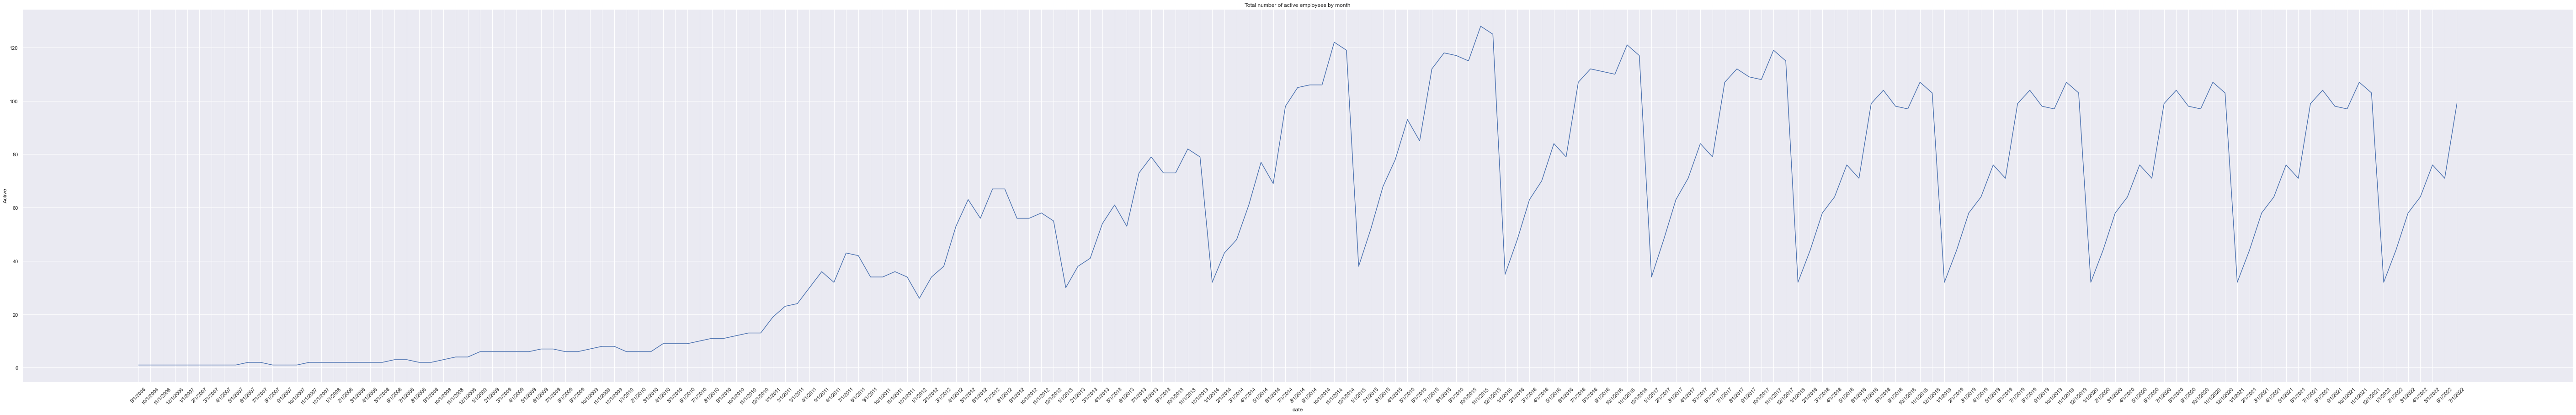

In [181]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="Active",data=active_df)
plt.xticks(rotation=45)
plt.title("Total number of active employees by month")
plt.show()

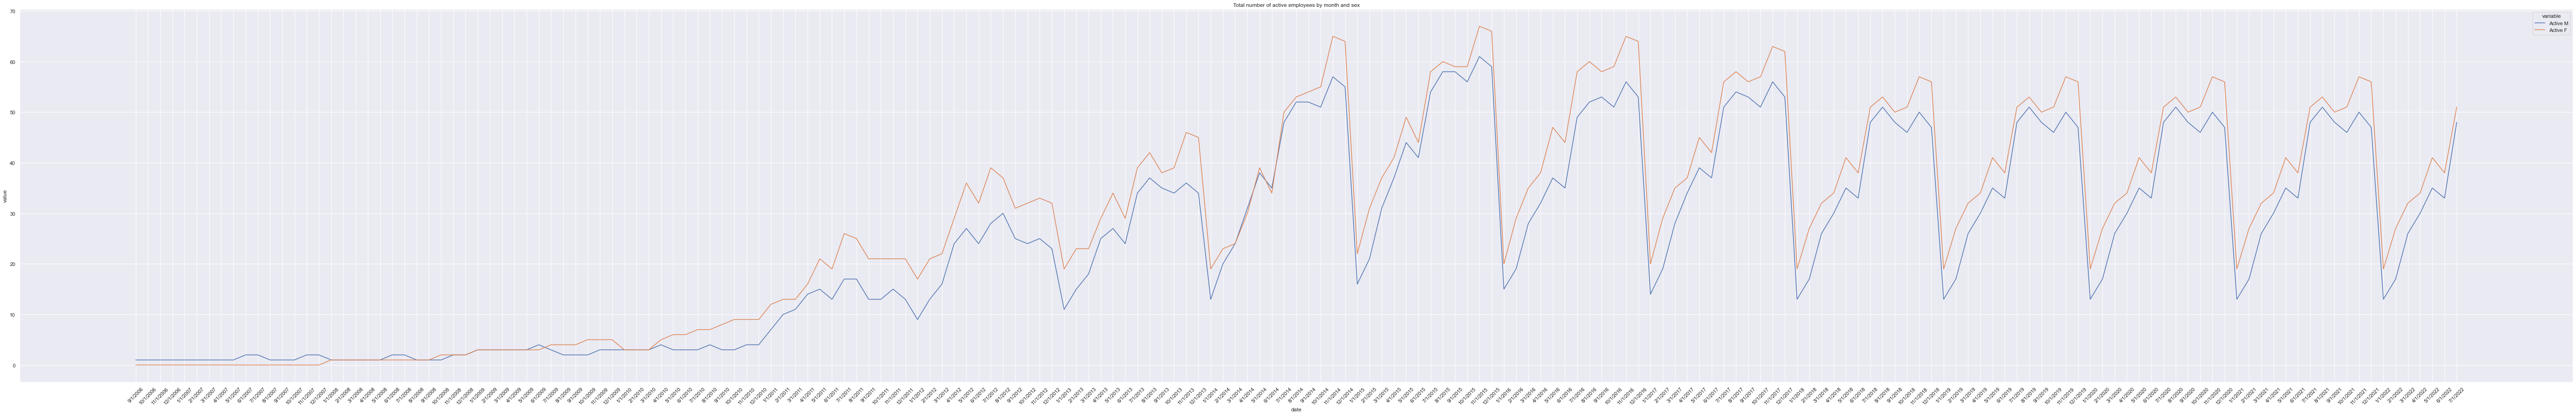

In [182]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=pd.melt(active_df[["date","Active M","Active F"]],["date"]))
plt.xticks(rotation=45)
plt.title("Total number of active employees by month and sex")
plt.show()

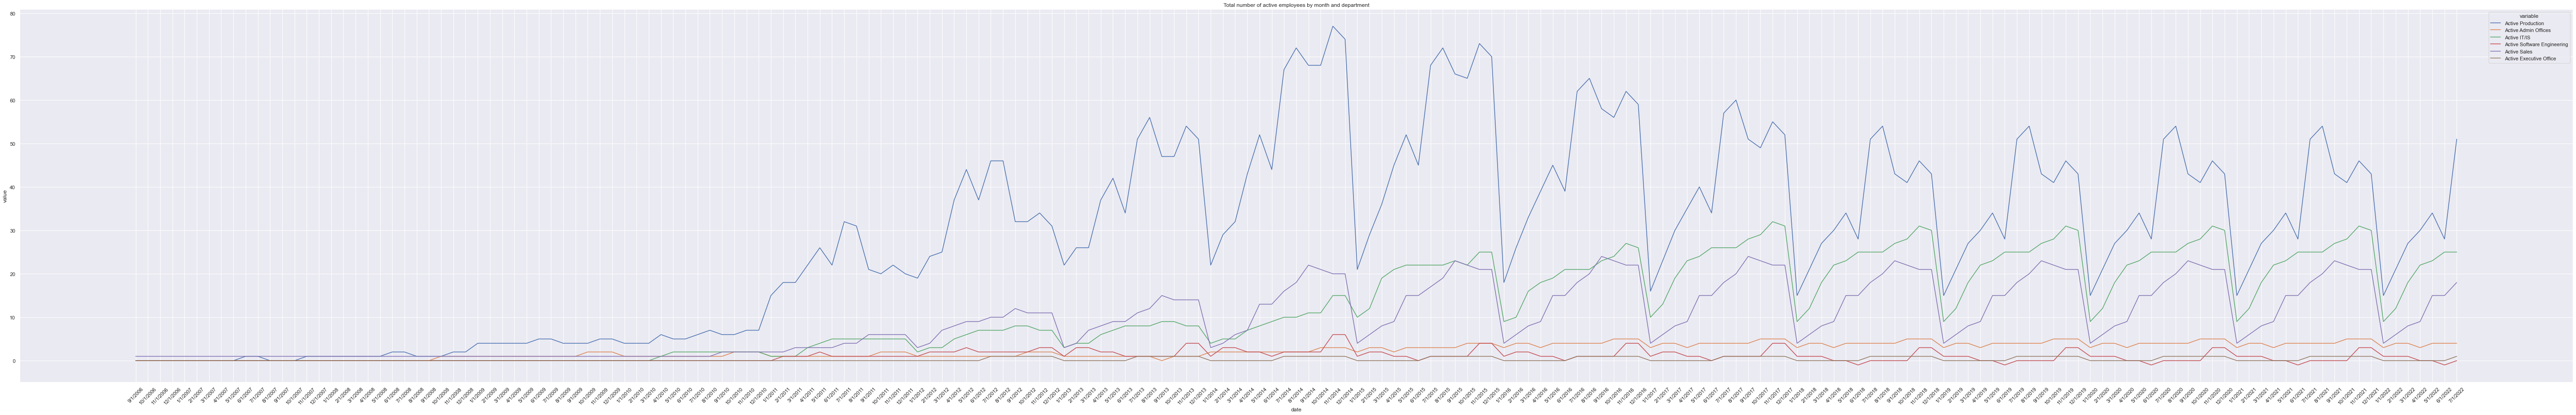

In [183]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(active_df[["date","Active Production","Active Admin Offices","Active IT/IS",
                                "Active Software Engineering","Active Sales","Active Executive Office"]],["date"]))
plt.xticks(rotation=45)
plt.title("Total number of active employees by month and department")
plt.show()

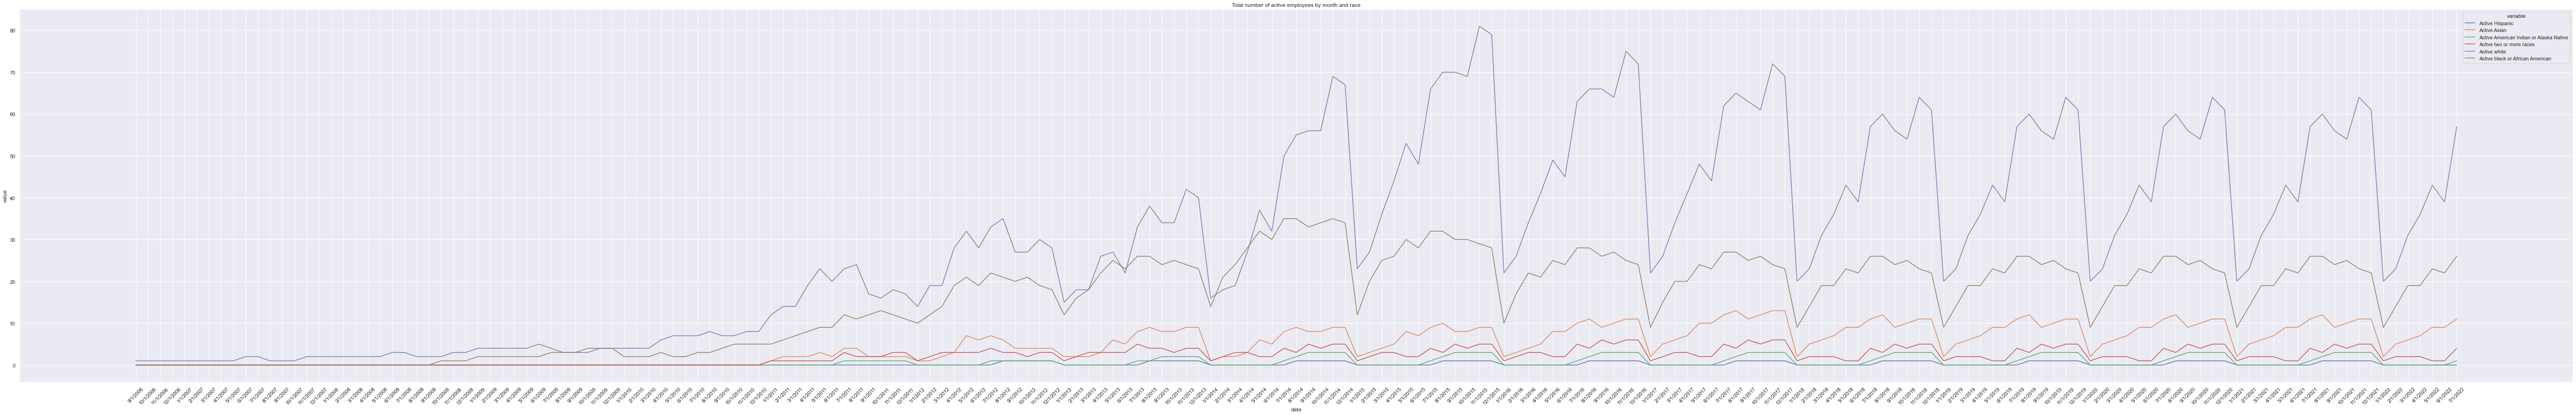

In [184]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(active_df[["date","Active Hispanic","Active Asian","Active American Indian or Alaska Native",
                                "Active two or more races","Active white","Active black or African American"]],["date"]))
plt.xticks(rotation=45)
plt.title("Total number of active employees by month and race")
plt.show()

In [185]:
#Compute seniority for each employee
seniority=[]
for i, doh in enumerate(df["DateofHire"]):
    doh_year=int(doh.split("/")[2])
    doh_month=int(doh.split("/")[0])
    
    if pd.isna(df["DateofTermination"].iloc[i])==False:
        dot=df["DateofTermination"].iloc[i]
        dot_year=int(dot.split("/")[2])
        dot_month=int(dot.split("/")[0])
        if dot_month>=doh_month:
            seniority.append(dot_year-doh_year)
        else:
            seniority.append(dot_year-doh_year-1)
    else:
        if month>=doh_month:
            seniority.append(year-doh_year)
        else:
            seniority.append(year-doh_year-1)

df["seniority"]=seniority
df.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

   ManagerID  RecruitmentSource PerformanceScore EngagementSurvey  \
0       22.0           LinkedIn          Exceeds             4.60   
1        4.0             Indeed      Fully Meets             4.96   
2       20.0           LinkedIn      Fully Meets             3.02   
3       16.0             Indeed      Fully Meets             4.84   
4       39.0      Google Search      Fully Meets             5.00   

   EmpSatisfaction SpecialProjectsCount LastPerformanceReview_Date  \
0                5                    0                  1/17/2019   
1                3                    6                  2/24/2016   
2                3                    0                  5/15/2012   
3                5                    0                   1/3/2019   
4                4                    0                   2/1/2016   

  DaysLateLast30 Absences seniority  
0              0        1        11  
1              0       17         1  
2              0        3         1  
3              0       15        14  
4              0        2         5  

[5 rows x 37 columns]

In [186]:
n_cutoffs=7
seniority_cutoffs=np.linspace(0,max(df["seniority"]),n_cutoffs,endpoint=True)
list_count_F=[]
list_count_M=[]
seniority_intervals=[]
for i in range(n_cutoffs-1):
    seniority_intervals.append("%.2f-%.2f years"%(seniority_cutoffs[i],seniority_cutoffs[i+1]))
    count_F=0
    count_M=0
    for j, seniority in enumerate(df["seniority"]):
        if seniority>=seniority_cutoffs[i] and seniority<seniority_cutoffs[i+1]:
            if df["Sex"].iloc[j]=="F":
                count_F+=1
            else:
                count_M+=1
    list_count_F.append(count_F)
    list_count_M.append(count_M)

print(list_count_F)
print(list_count_M)
print(seniority_intervals)
temp=pd.DataFrame()
temp["interval"]=seniority_intervals
temp["M"]=list_count_M
temp["F"]=list_count_F
temp

[26, 30, 44, 57, 18, 1]
[16, 28, 32, 48, 9, 1]
['0.00-2.67 years', '2.67-5.33 years', '5.33-8.00 years', '8.00-10.67 years', '10.67-13.33 years', '13.33-16.00 years']


interval   M   F
0    0.00-2.67 years  16  26
1    2.67-5.33 years  28  30
2    5.33-8.00 years  32  44
3   8.00-10.67 years  48  57
4  10.67-13.33 years   9  18
5  13.33-16.00 years   1   1

In [187]:
seniority_data=pd.melt(temp,["interval"])
seniority_data

interval variable  value
0     0.00-2.67 years        M     16
1     2.67-5.33 years        M     28
2     5.33-8.00 years        M     32
3    8.00-10.67 years        M     48
4   10.67-13.33 years        M      9
5   13.33-16.00 years        M      1
6     0.00-2.67 years        F     26
7     2.67-5.33 years        F     30
8     5.33-8.00 years        F     44
9    8.00-10.67 years        F     57
10  10.67-13.33 years        F     18
11  13.33-16.00 years        F      1

Text(0.5, 1.0, 'Seniority by sex')

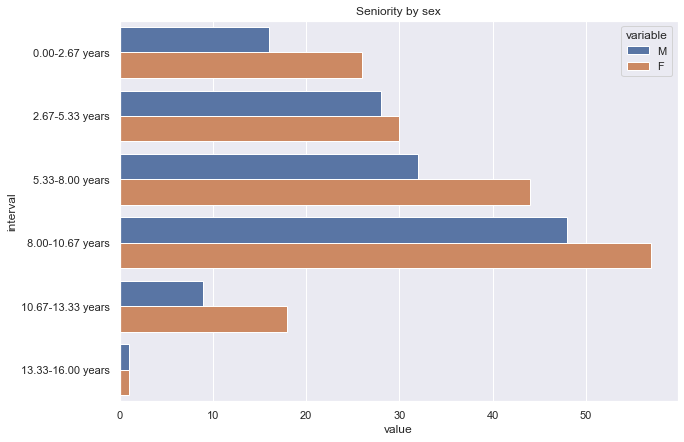

In [188]:
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="value",y="interval",hue="variable",data=seniority_data)
plt.title("Seniority by sex")

In [189]:
def age(dob):
    dob_year=int("19"+dob.split("/")[2])
    dob_month=int(dob.split("/")[0])
    if month<=dob_month:
        return year-dob_year
    else:
        return year-dob_year-1
    
df["Age"]=df["DOB"].apply(lambda dob: age(dob))
df.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

   RecruitmentSource  PerformanceScore EngagementSurvey EmpSatisfaction  \
0           LinkedIn           Exceeds             4.60               5   
1             Indeed       Fully Meets             4.96               3   
2           LinkedIn       Fully Meets             3.02               3   
3             Indeed       Fully Meets             4.84               5   
4      Google Search       Fully Meets             5.00               4   

   SpecialProjectsCount LastPerformanceReview_Date DaysLateLast30 Absences  \
0                     0                  1/17/2019              0        1   
1                     6                  2/24/2016              0       17   
2                     0                  5/15/2012              0        3   
3                     0                   1/3/2019              0       15   
4                     0                   2/1/2016              0        2   

  seniority Age  
0        11  39  
1         1  46  
2         1  34  
3        14  34  
4         5  33  

[5 rows x 38 columns]

Text(0.5, 1.0, 'Average age by department')

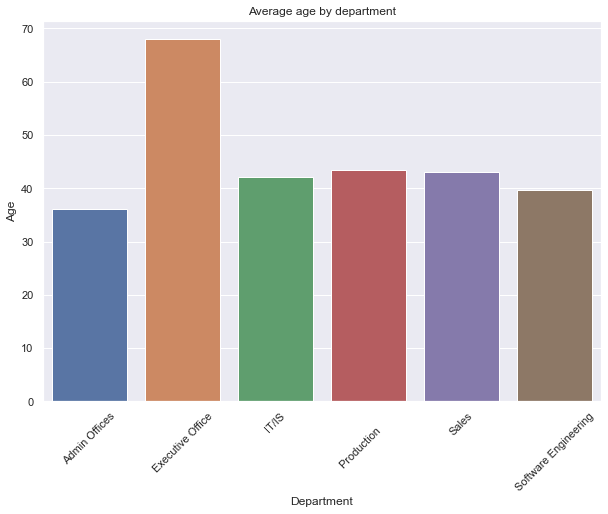

In [190]:
b=df.groupby("Department")["Age"].mean().reset_index()
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="Department",y="Age",data=b)
plt.xticks(rotation=45)
plt.title("Average age by department")

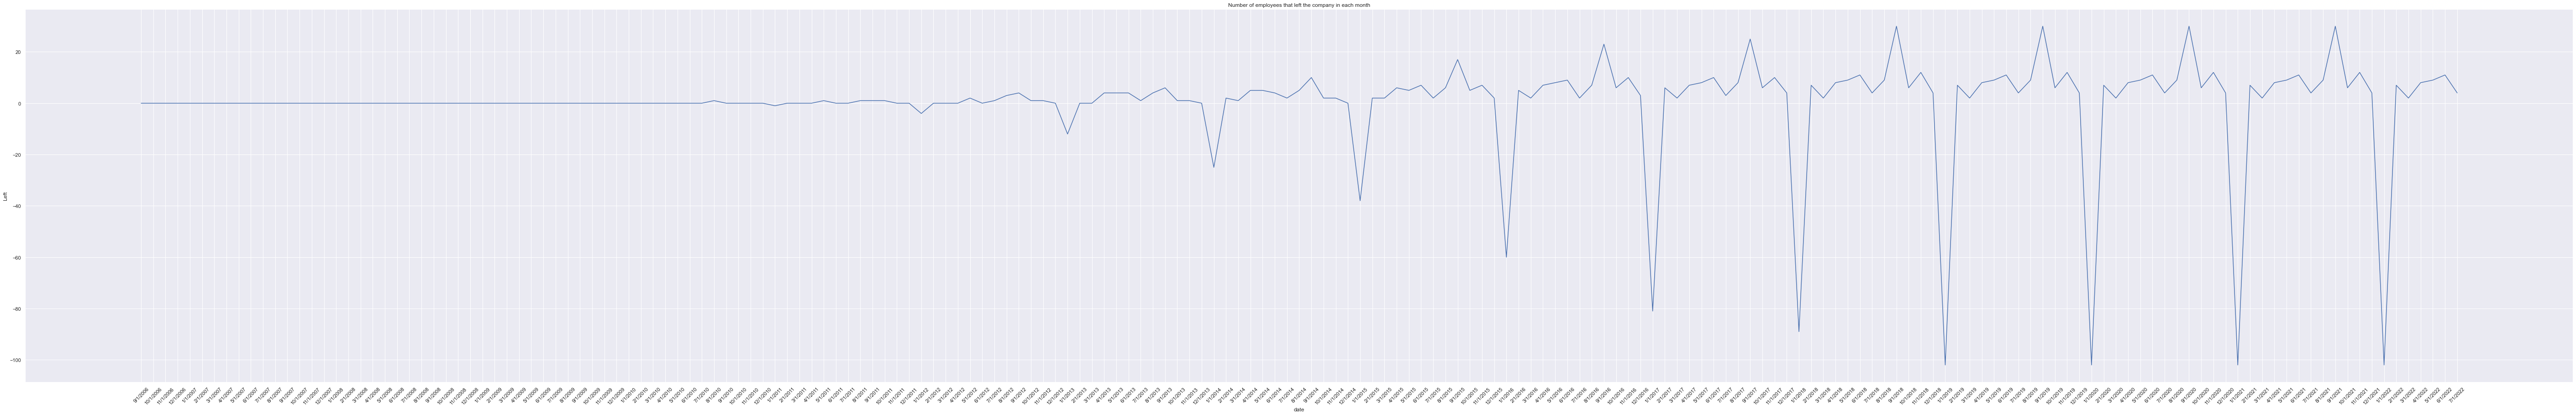

In [191]:
##############
#Separations demographics
###############
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="Left",data=active_df)
plt.xticks(rotation=45)
plt.title("Number of employees that left the company in each month")
plt.show()

In [192]:
separations_data=df[pd.isna(df["DateofTermination"])==False]
separations_data

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
4            Anderson, Carol   10069          0                2         0   
10       Baczenski, Rachael    10252          1                1         0   
11            Barbara, Thomas  10242          1                1         1   
..                        ...    ...        ...              ...       ...   
301             Wilber, Barry  10048          1                1         1   
302             Wilkes, Annie  10204          0                2         0   
303     Williams, Jacquelyn    10264          0                0         0   
304        Winthrop, Jordan    10033          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
4              5       5            3                       0   50825  ...   
10             5       5            3                       1   54670  ...   
11             5       5            3                       1   47211  ...   
..           ...     ...          ...                     ...     ...  ...   
301            5       5            3                       0   55140  ...   
302            5       5            3                       0   58062  ...   
303            5       5            3                       1   59728  ...   
304            5       5            4                       0   70507  ...   
307            5       5            1                       0   48513  ...   

      RecruitmentSource  PerformanceScore EngagementSurvey EmpSatisfaction  \
1                Indeed       Fully Meets             4.96               3   
2              LinkedIn       Fully Meets             3.02               3   
4         Google Search       Fully Meets             5.00               4   
10   Diversity Job Fair       Fully Meets             4.20               4   
11   Diversity Job Fair       Fully Meets             4.20               3   
..                  ...               ...              ...             ...   
301             Website       Fully Meets             5.00               3   
302       Google Search       Fully Meets             3.60               5   
303  Diversity Job Fair       Fully Meets             4.30               4   
304            LinkedIn           Exceeds             5.00               3   
307       Google Search               PIP             3.20               2   

     SpecialProjectsCount LastPerformanceReview_Date DaysLateLast30 Absences  \
1                       6                  2/24/2016              0       17   
2                       0                  5/15/2012              0        3   
4                       0                   2/1/2016              0        2   
10                      0                  1/30/2016              0       12   
11                      0                   5/6/2016              0       15   
..                    ...                        ...            ...      ...   
301                     0                  2/15/2015              0        7   
302                     0                   2/6/2011              0        9   
303                     0                   6/2/2014              0       16   
304                     0                  1/19/2016              0        7   
307                     0                   9/2/2015              5        4   

    seniority Age  
1           1  46  
2           1  34  
4           5  33  
10          6  47  
11          4  47  
..        ...  ..  
301         4  57  
302         1  39  
303         3  53  
304         3  64  
307         7  39  

[10

Text(0.5, 1.0, 'From which department did employees leave?')

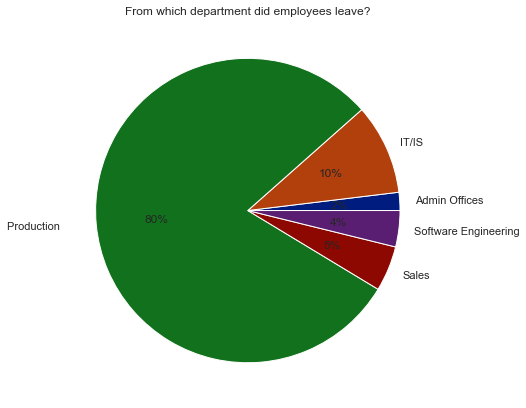

In [193]:
b=separations_data.groupby("Department")["Department"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")
plt.title("From which department did employees leave?")

Text(0.5, 1.0, 'Which sex left the most?')

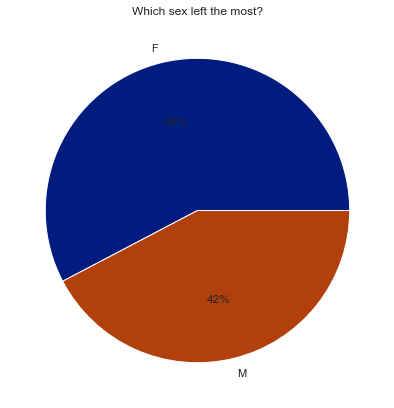

In [194]:
b=separations_data.groupby("Sex")["Sex"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")
plt.title("Which sex left the most?")

Text(0.5, 1.0, 'Which race left the most?')

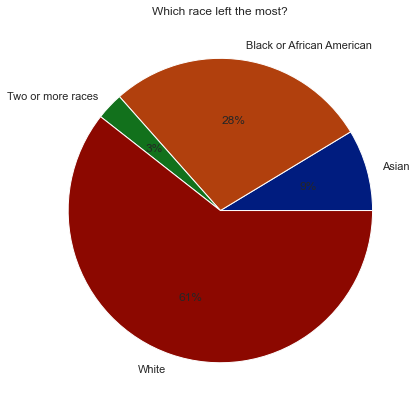

In [195]:
b=separations_data.groupby("RaceDesc")["RaceDesc"].count()
labels=list(b.index)
values=list(b.values)

sns.set(rc={"figure.figsize":(10,7)})
palette_color=sns.color_palette("dark")
plt.pie(values,labels=labels,colors=palette_color,autopct="%.0f%%")
plt.title("Which race left the most?")

[17, 9, 20, 7, 7, 0]
[11, 5, 16, 5, 6, 0]
['0.00-1.50 years', '1.50-3.00 years', '3.00-4.50 years', '4.50-6.00 years', '6.00-7.50 years', '7.50-9.00 years']


Text(0.5, 1.0, 'Seniority by sex for employees that left')

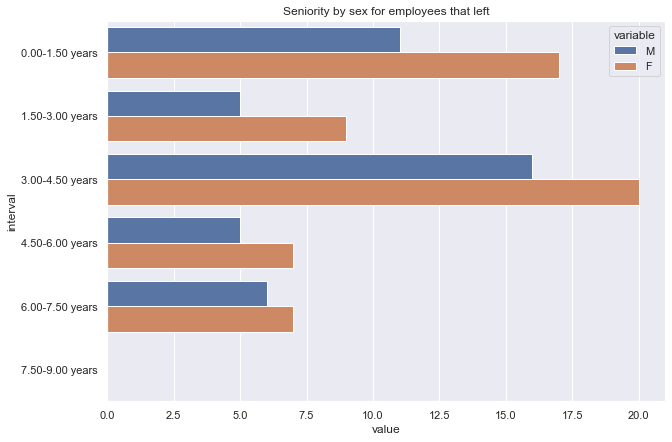

In [196]:
n_cutoffs=7
seniority_cutoffs=np.linspace(0,max(separations_data["seniority"]),n_cutoffs,endpoint=True)
list_count_F=[]
list_count_M=[]
seniority_intervals=[]
for i in range(n_cutoffs-1):
    seniority_intervals.append("%.2f-%.2f years"%(seniority_cutoffs[i],seniority_cutoffs[i+1]))
    count_F=0
    count_M=0
    for j, seniority in enumerate(separations_data["seniority"]):
        if seniority>=seniority_cutoffs[i] and seniority<seniority_cutoffs[i+1]:
            if separations_data["Sex"].iloc[j]=="F":
                count_F+=1
            else:
                count_M+=1
    list_count_F.append(count_F)
    list_count_M.append(count_M)

print(list_count_F)
print(list_count_M)
print(seniority_intervals)
temp=pd.DataFrame()
temp["interval"]=seniority_intervals
temp["M"]=list_count_M
temp["F"]=list_count_F
temp

seniority_data=pd.melt(temp,["interval"])
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="value",y="interval",hue="variable",data=seniority_data)
plt.title("Seniority by sex for employees that left")

In [197]:
#Performance score in terms of each department for employees that left
fig=px.bar(separations_data,x="Department",color="PerformanceScore",title="Employees that left each department and their performance")
fig.show()

In [198]:
#Sex in terms of each department
fig=px.bar(separations_data,x="Department",color="Sex",title="Employees that left each department and their sex")
fig.show()

In [199]:
#Race in terms of each department
fig=px.bar(separations_data,x="Department",color="RaceDesc",title="Employees that left each department and their race")
fig.show()

Text(0.5, 1.0, 'Average age by department for employees that left')

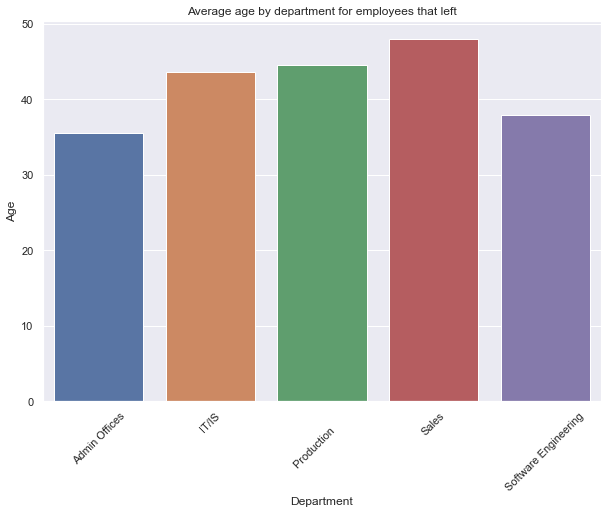

In [200]:
b=separations_data.groupby("Department")["Age"].mean().reset_index()
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="Department",y="Age",data=b)
plt.xticks(rotation=45)
plt.title("Average age by department for employees that left")

In [201]:
######################
#Recruitment
######################

#Function that takes as input the output of create_dates
#-counts the number of active employees before each date,
#-counts the number of active F and M before each date 
#-counts the number of active in each department before each date
#-counts the number of active in each race before each date

def open_closed_before_dates(dates):
    #dates=create_dates(first_date_of_hire(df["DateofHire"]))
    count_closed=[]
    count_open=[]

    count_closed_F=[]
    count_closed_M=[]    #will be count_closed-count_closed_F
    
    count_open_F=[]
    count_open_M=[]    #will be count_open-count_open_F

    count_closed_production=[]
    count_closed_admin=[]
    count_closed_it=[]
    count_closed_software=[]
    count_closed_sales=[]
    count_closed_exec=[]      #will be count_closed-sum of the other departments
    
    count_open_production=[]
    count_open_admin=[]
    count_open_it=[]
    count_open_software=[]
    count_open_sales=[]
    count_open_exec=[]      #will be count_open-sum of the other departments

    count_closed_hispanic=[]
    count_closed_asian=[]
    count_closed_alaska=[]
    count_closed_2=[]
    count_closed_white=[]
    count_closed_black=[]      #will be count_active-sum of the other races
    
    count_open_hispanic=[]
    count_open_asian=[]
    count_open_alaska=[]
    count_open_2=[]
    count_open_white=[]
    count_open_black=[]      #will be count_open-sum of the other races

    #take each consecutive month
    for date in dates:
        current_count_closed=0
        current_count_open=0
        current_count_closed_F=0
        current_count_open_F=0
    
        current_count_closed_production=0
        current_count_closed_admin=0
        current_count_closed_it=0
        current_count_closed_software=0
        current_count_closed_sales=0
        current_count_open_production=0
        current_count_open_admin=0
        current_count_open_it=0
        current_count_open_software=0
        current_count_open_sales=0
    
        current_count_closed_hispanic=0
        current_count_closed_asian=0
        current_count_closed_alaska=0
        current_count_closed_2=0
        current_count_closed_white=0
        current_count_open_hispanic=0
        current_count_open_asian=0
        current_count_open_alaska=0
        current_count_open_2=0
        current_count_open_white=0
    
        current_month=int(date.split("/")[0])
        current_year=int(date.split("/")[2])
    
        #take each hire date in the database
        for i, hire_date in enumerate(df["DateofHire"]):
            hire_month=int(hire_date.split("/")[0])
            hire_year=int(hire_date.split("/")[2])
        
            #if that person was fired
            if pd.isna(df["DateofTermination"].iloc[i])==False:
                termination_date=df["DateofTermination"].iloc[i]
                termination_month=int(termination_date.split("/")[0])
                termination_year=int(termination_date.split("/")[2])
            
                #if the person was fired before the current date from the consecutive dates list, I need to decrease all open positions counts by 1
                if hire_month<=current_month and hire_year<=current_year and termination_month<=current_month and termination_year<=current_year:
                    current_count_open+=1
                    if df["Sex"].iloc[i]=="F":
                        current_count_open_F+=1
            
                    if df["Department"].iloc[i]=="Production       ":
                        current_count_open_production+=1    
                    if df["Department"].iloc[i]=="Admin Offices":
                        current_count_open_admin+=1
                    if df["Department"].iloc[i]=="IT/IS":
                        current_count_open_it+=1
                    if df["Department"].iloc[i]=="Software Engineering":
                        current_count_open_software+=1
                    if df["Department"].iloc[i]=="Sales":
                        current_count_open_sales+=1
            
                    if df["RaceDesc"].iloc[i]=="Hispanic":
                        current_count_open_hispanic+=1
                    if df["RaceDesc"].iloc[i]=="Asian":
                        current_count_open_asian+=1
                    if df["RaceDesc"].iloc[i]=="American Indian or Alaska Native":
                        current_count_open_alaska+=1
                    if df["RaceDesc"].iloc[i]=="Two or more races":
                        current_count_open_2+=1
                    if df["RaceDesc"].iloc[i]=="White":
                        current_count_open_white+=1
            
                #if that person was fired after the current date from the consecutive dates list, I need to increase all closed positions counts by 1
                if hire_month<=current_month and hire_year<=current_year and termination_month>current_month and termination_year>current_year:
                    current_count_closed+=1
                    if df["Sex"].iloc[i]=="F":
                        current_count_closed_F+=1
            
                    if df["Department"].iloc[i]=="Production       ":
                        current_count_closed_production+=1    
                    if df["Department"].iloc[i]=="Admin Offices":
                        current_count_closed_admin+=1
                    if df["Department"].iloc[i]=="IT/IS":
                        current_count_closed_it+=1
                    if df["Department"].iloc[i]=="Software Engineering":
                        current_count_closed_software+=1
                    if df["Department"].iloc[i]=="Sales":
                        current_count_closed_sales+=1
            
                    if df["RaceDesc"].iloc[i]=="Hispanic":
                        current_count_closed_hispanic+=1
                    if df["RaceDesc"].iloc[i]=="Asian":
                        current_count_closed_asian+=1
                    if df["RaceDesc"].iloc[i]=="American Indian or Alaska Native":
                        current_count_closed_alaska+=1
                    if df["RaceDesc"].iloc[i]=="Two or more races":
                        current_count_closed_2+=1
                    if df["RaceDesc"].iloc[i]=="White":
                        current_count_closed_white+=1
        
            #if that person was never fired, I need to increase all closed positions counts by 1.
            else:
                if hire_month<=current_month and hire_year<=current_year:
                    current_count_closed+=1
                    if df["Sex"].iloc[i]=="F":
                        current_count_closed_F+=1
            
                    if df["Department"].iloc[i]=="Production       ":
                        current_count_closed_production+=1    
                    if df["Department"].iloc[i]=="Admin Offices":
                        current_count_closed_admin+=1
                    if df["Department"].iloc[i]=="IT/IS":
                        current_count_closed_it+=1
                    if df["Department"].iloc[i]=="Software Engineering":
                        current_count_closed_software+=1
                    if df["Department"].iloc[i]=="Sales":
                        current_count_closed_sales+=1
            
                    if df["RaceDesc"].iloc[i]=="Hispanic":
                        current_count_closed_hispanic+=1
                    if df["RaceDesc"].iloc[i]=="Asian":
                        current_count_closed_asian+=1
                    if df["RaceDesc"].iloc[i]=="American Indian or Alaska Native":
                        current_count_closed_alaska+=1
                    if df["RaceDesc"].iloc[i]=="Two or more races":
                        current_count_closed_2+=1
                    if df["RaceDesc"].iloc[i]=="White":
                        current_count_closed_white+=1
            
        count_closed.append(current_count_closed)
        count_open.append(current_count_open)
    
        count_closed_F.append(current_count_closed_F)
        count_closed_M.append(current_count_closed-current_count_closed_F)
        count_open_F.append(current_count_open_F)
        count_open_M.append(current_count_open-current_count_open_F)
    
        count_closed_production.append(current_count_closed_production)
        count_closed_admin.append(current_count_closed_admin)
        count_closed_it.append(current_count_closed_it)
        count_closed_software.append(current_count_closed_software)
        count_closed_sales.append(current_count_closed_sales)
        count_closed_exec.append(current_count_closed-current_count_closed_production-current_count_closed_admin-
                                 current_count_closed_it-current_count_closed_software-current_count_closed_sales)
        count_open_production.append(current_count_open_production)
        count_open_admin.append(current_count_open_admin)
        count_open_it.append(current_count_open_it)
        count_open_software.append(current_count_open_software)
        count_open_sales.append(current_count_open_sales)
        count_open_exec.append(current_count_open-current_count_open_production-current_count_open_admin-
                                 current_count_open_it-current_count_open_software-current_count_open_sales)
    
        count_closed_hispanic.append(current_count_closed_hispanic)
        count_closed_asian.append(current_count_closed_asian)
        count_closed_alaska.append(current_count_closed_alaska)
        count_closed_2.append(current_count_closed_2)
        count_closed_white.append(current_count_closed_white)
        count_closed_black.append(current_count_closed-current_count_closed_hispanic-current_count_closed_asian-
                                  current_count_closed_alaska-current_count_closed_2-current_count_closed_white)
        count_open_hispanic.append(current_count_open_hispanic)
        count_open_asian.append(current_count_open_asian)
        count_open_alaska.append(current_count_open_alaska)
        count_open_2.append(current_count_open_2)
        count_open_white.append(current_count_open_white)
        count_open_black.append(current_count_open-current_count_open_hispanic-current_count_open_asian-
                                  current_count_open_alaska-current_count_open_2-current_count_open_white)
    
    res=pd.DataFrame()
    res["date"]=dates
    n_dates=len(dates)
    res["Total Closed Positions"]=count_closed
    count_closed.insert(0,0)
    res["Closed Positions"]=[count_closed[i+1]-count_closed[i] for i in range(n_dates)]
    res["Total Open Positions"]=count_open
    count_open.insert(0,0)
    res["Open Positions"]=[count_open[i+1]-count_open[i] for i in range(n_dates)]
    res["Total Closed F Positions"]=count_closed_F
    count_closed_F.insert(0,0)
    res["Closed F Positions"]=[count_closed_F[i+1]-count_closed_F[i] for i in range(n_dates)]
    res["Total Closed M Positions"]=count_closed_M
    count_closed_M.insert(0,0)
    res["Closed M Positions"]=[count_closed_M[i+1]-count_closed_M[i] for i in range(n_dates)]
    res["Total Open F Positions"]=count_open_F
    count_open_F.insert(0,0)
    res["Open F Positions"]=[count_open_F[i+1]-count_open_F[i] for i in range(n_dates)]
    res["Total Open M Positions"]=count_open_M
    count_open_M.insert(0,0)
    res["Open M Positions"]=[count_open_M[i+1]-count_open_M[i] for i in range(n_dates)]
    
    res["Total Closed Production Positions"]=count_closed_production
    count_closed_production.insert(0,0)
    res["Closed Production Positions"]=[count_closed_production[i+1]-count_closed_production[i] for i in range(n_dates)]
    res["Total Closed Admin Offices Positions"]=count_closed_admin
    count_closed_admin.insert(0,0)
    res["Closed Admin Offices Positions"]=[count_closed_admin[i+1]-count_closed_admin[i] for i in range(n_dates)]
    res["Total Closed IT/IS Positions"]=count_closed_it
    count_closed_it.insert(0,0)
    res["Closed IT/IS Positions"]=[count_closed_it[i+1]-count_closed_it[i] for i in range(n_dates)]
    res["Total Closed Software Engineering Positions"]=count_closed_software
    count_closed_software.insert(0,0)
    res["Closed Software Engineering Positions"]=[count_closed_software[i+1]-count_closed_software[i] for i in range(n_dates)]
    res["Total Closed Sales Positions"]=count_closed_sales
    count_closed_sales.insert(0,0)
    res["Closed Sales Positions"]=[count_closed_sales[i+1]-count_closed_sales[i] for i in range(n_dates)]
    res["Total Closed Executive Office Positions"]=count_closed_exec
    count_closed_exec.insert(0,0)
    res["Closed Executive Office Positions"]=[count_closed_exec[i+1]-count_closed_exec[i] for i in range(n_dates)]
    res["Total Closed Hispanic Positions"]=count_closed_hispanic
    #count_closed_hispanic.insert(0,0)
    #res["Closed Hispanic Positions"]=[count_closed_hispanic[i+1]-count_closed_hispanic[i] for i in range(n_dates)]
    
    res["Total Open Production Positions"]=count_open_production
    count_open_production.insert(0,0)
    res["Open Production Positions"]=[count_open_production[i+1]-count_open_production[i] for i in range(n_dates)]
    res["Total Open Admin Offices Positions"]=count_open_admin
    count_open_admin.insert(0,0)
    res["Open Admin Offices Positions"]=[count_open_admin[i+1]-count_open_admin[i] for i in range(n_dates)]
    res["Total Open IT/IS Positions"]=count_open_it
    count_open_it.insert(0,0)
    res["Open IT/IS Positions"]=[count_open_it[i+1]-count_open_it[i] for i in range(n_dates)]
    res["Total Open Software Engineering Positions"]=count_open_software
    count_open_software.insert(0,0)
    res["Open Software Engineering Positions"]=[count_open_software[i+1]-count_open_software[i] for i in range(n_dates)]
    res["Total Open Sales Positions"]=count_open_sales
    count_open_sales.insert(0,0)
    res["Open Sales Positions"]=[count_open_sales[i+1]-count_open_sales[i] for i in range(n_dates)]
    res["Total Open Executive Office Positions"]=count_open_exec
    count_open_exec.insert(0,0)
    res["Open Executive Office Positions"]=[count_open_exec[i+1]-count_open_exec[i] for i in range(n_dates)]
    
    res["Total Closed Positions for Hispanics"]=count_closed_hispanic
    count_closed_hispanic.insert(0,0)
    res["Closed Positions for Hispanics"]=[count_closed_hispanic[i+1]-count_closed_hispanic[i] for i in range(n_dates)]
    res["Total Closed Positions for Asians"]=count_closed_asian
    count_closed_asian.insert(0,0)
    res["Closed Positions for Asians"]=[count_closed_asian[i+1]-count_closed_asian[i] for i in range(n_dates)]
    res["Total Closed Positions for American Indians or Alaska Natives"]=count_closed_alaska
    count_closed_alaska.insert(0,0)
    res["Closed Positions for American Indians or Alaska Natives"]=[count_closed_alaska[i+1]-count_closed_alaska[i] for i in range(n_dates)]
    res["Total Closed Positions for two or more races"]=count_closed_2
    count_closed_2.insert(0,0)
    res["Closed Positions for two or more races"]=[count_closed_2[i+1]-count_closed_2[i] for i in range(n_dates)]
    res["Total Closed Positions for Whites"]=count_closed_white
    count_closed_white.insert(0,0)
    res["Closed Positions for Whites"]=[count_closed_white[i+1]-count_closed_white[i] for i in range(n_dates)]
    res["Total Closed Positions for Blacks or African Americans"]=count_closed_black
    count_closed_black.insert(0,0)
    res["Closed Positions for Blacks or African Americans"]=[count_closed_black[i+1]-count_closed_black[i] for i in range(n_dates)]
    
    res["Total Open Positions for Hispanics"]=count_open_hispanic
    count_open_hispanic.insert(0,0)
    res["Open Positions for Hispanics"]=[count_open_hispanic[i+1]-count_open_hispanic[i] for i in range(n_dates)]
    res["Total Open Positions for Asians"]=count_open_asian
    count_open_asian.insert(0,0)
    res["Open Positions for Asians"]=[count_open_asian[i+1]-count_open_asian[i] for i in range(n_dates)]
    res["Total Open Positions for American Indians or Alaska Natives"]=count_open_alaska
    count_open_alaska.insert(0,0)
    res["Open Positions for American Indians or Alaska Natives"]=[count_open_alaska[i+1]-count_open_alaska[i] for i in range(n_dates)]
    res["Total Open Positions for two or more races"]=count_open_2
    count_open_2.insert(0,0)
    res["Open Positions for two or more races"]=[count_open_2[i+1]-count_open_2[i] for i in range(n_dates)]
    res["Total Open Positions for Whites"]=count_open_white
    count_open_white.insert(0,0)
    res["Open Positions for Whites"]=[count_open_white[i+1]-count_open_white[i] for i in range(n_dates)]
    res["Total Open Positions for Blacks or African Americans"]=count_open_black
    count_open_black.insert(0,0)
    res["Open Positions for Blacks or African Americans"]=[count_open_black[i+1]-count_open_black[i] for i in range(n_dates)]
    
    return res
 
positions_df=open_closed_before_dates(create_dates(first_date_of_hire(df["DateofHire"])))
positions_df.tail()

date  Total Closed Positions  Closed Positions  Total Open Positions  \
186  3/1/2022                      69                16                    11   
187  4/1/2022                      83                14                    19   
188  5/1/2022                     104                21                    28   
189  6/1/2022                     110                 6                    39   
190  7/1/2022                     142                32                    43   

     Open Positions  Total Closed F Positions  Closed F Positions  \
186               2                        38                   7   
187               8                        46                   8   
188               9                        58                  12   
189              11                        62                   4   
190               4                        77                  15   

     Total Closed M Positions  Closed M Positions  Total Open F Positions  \
186                        31                   9                       6   
187                        37                   6                      12   
188                        46                   9                      17   
189                        48                   2                      24   
190                        65                  17                      26   

     ...  Total Open Positions for Asians  Open Positions for Asians  \
186  ...                                1                          1   
187  ...                                1                          0   
188  ...                                1                          0   
189  ...                                2                          1   
190  ...                                2                          0   

     Total Open Positions for American Indians or Alaska Natives  \
186                                                  0             
187                                                  0             
188                                                  0             
189                                                  0             
190                                                  0             

     Open Positions for American Indians or Alaska Natives  \
186                                                  0       
187                                                  0       
188                                                  0       
189                                                  0       
190                                                  0       

     Total Open Positions for two or more races  \
186                                           0   
187                                           0   
188                                           1   
189                                           1   
190                                           1   

     Open Positions for two or more races  Total Open Positions for Whites  \
186                                     0                                6   
187                                     0                               10   
188                                     1                               17   
189                                     0                               24   
190                                     0                               28   

     Open Positions for Whites  \
186                          1   
187                          4   
188                          7   
189                          7   
190                          4   

     Total Open Positions for Blacks or African Americans  \
186                                                  4      
187                                                  8      
188                                                  9      
189                                                 12      
190                                                 12      

     Open Positions for Blacks or African Americans  
186                        

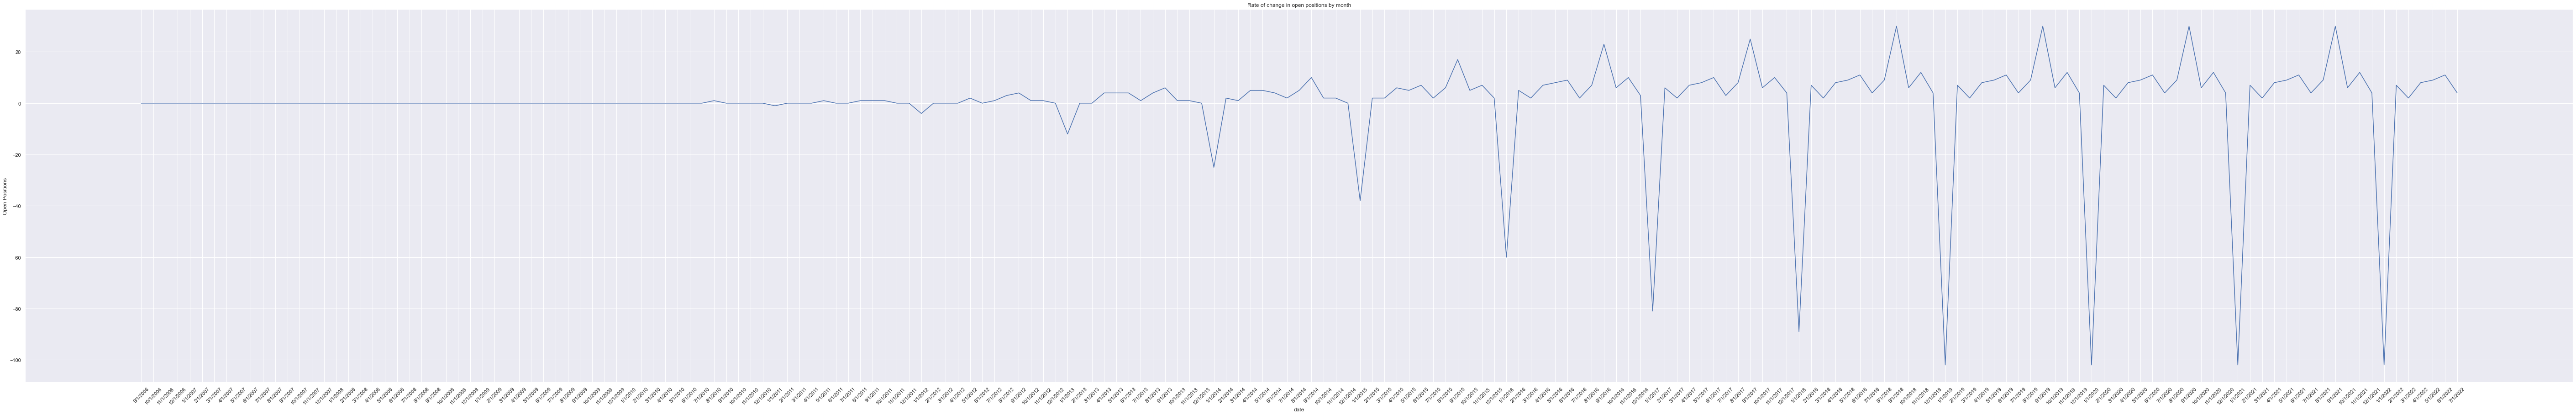

In [202]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="Open Positions",data=positions_df)
plt.xticks(rotation=45)
plt.title("Rate of change in open positions by month")
plt.show()

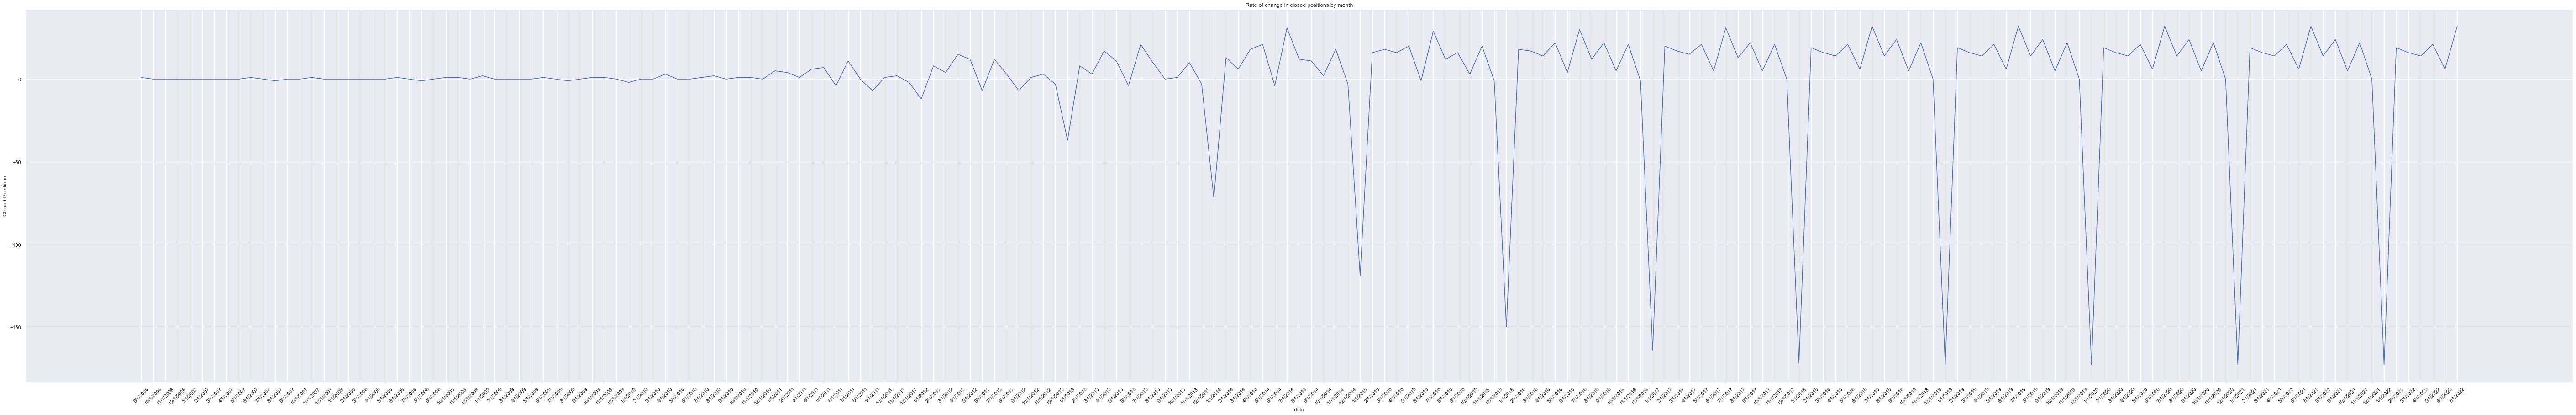

In [203]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="Closed Positions",data=positions_df)
plt.xticks(rotation=45)
plt.title("Rate of change in closed positions by month")
plt.show()

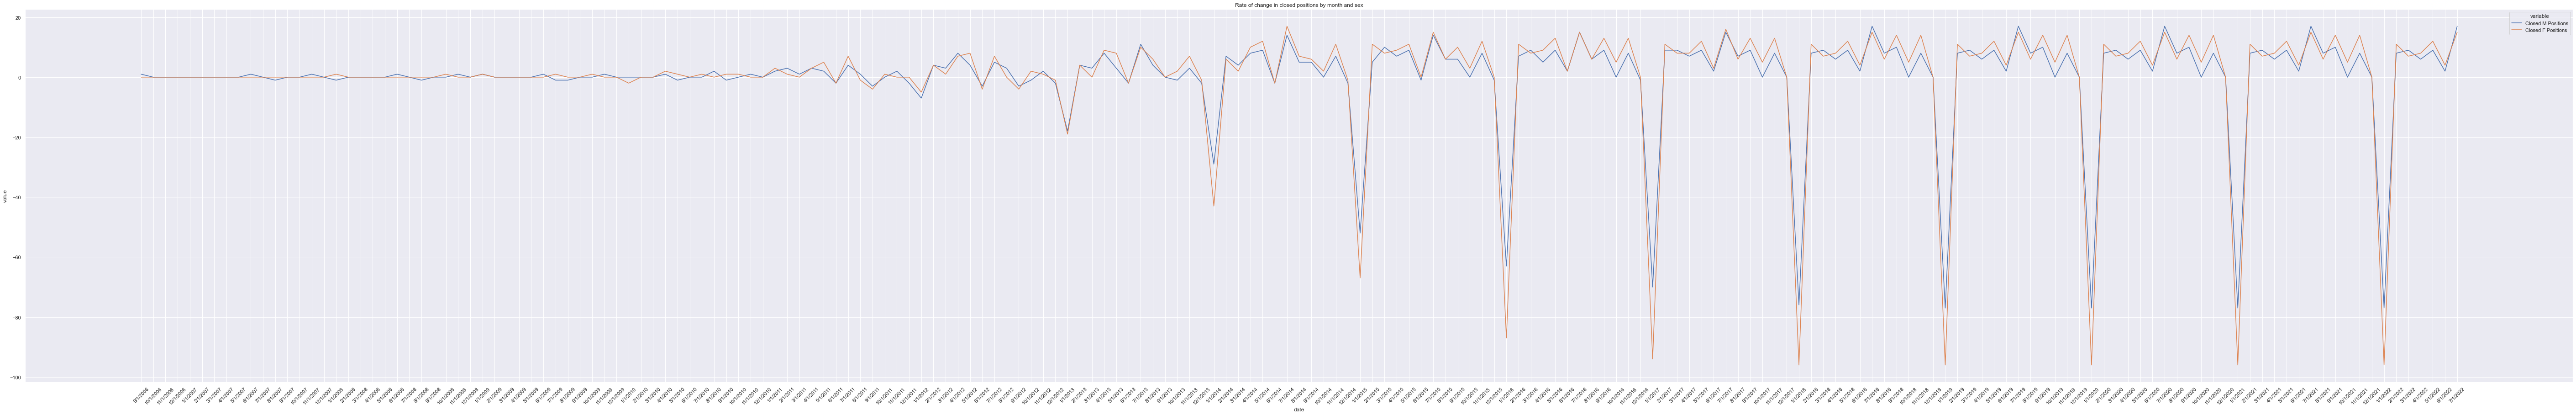

In [204]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=pd.melt(positions_df[["date","Closed M Positions","Closed F Positions"]],["date"]))
plt.xticks(rotation=45)
plt.title("Rate of change in closed positions by month and sex")
plt.show()

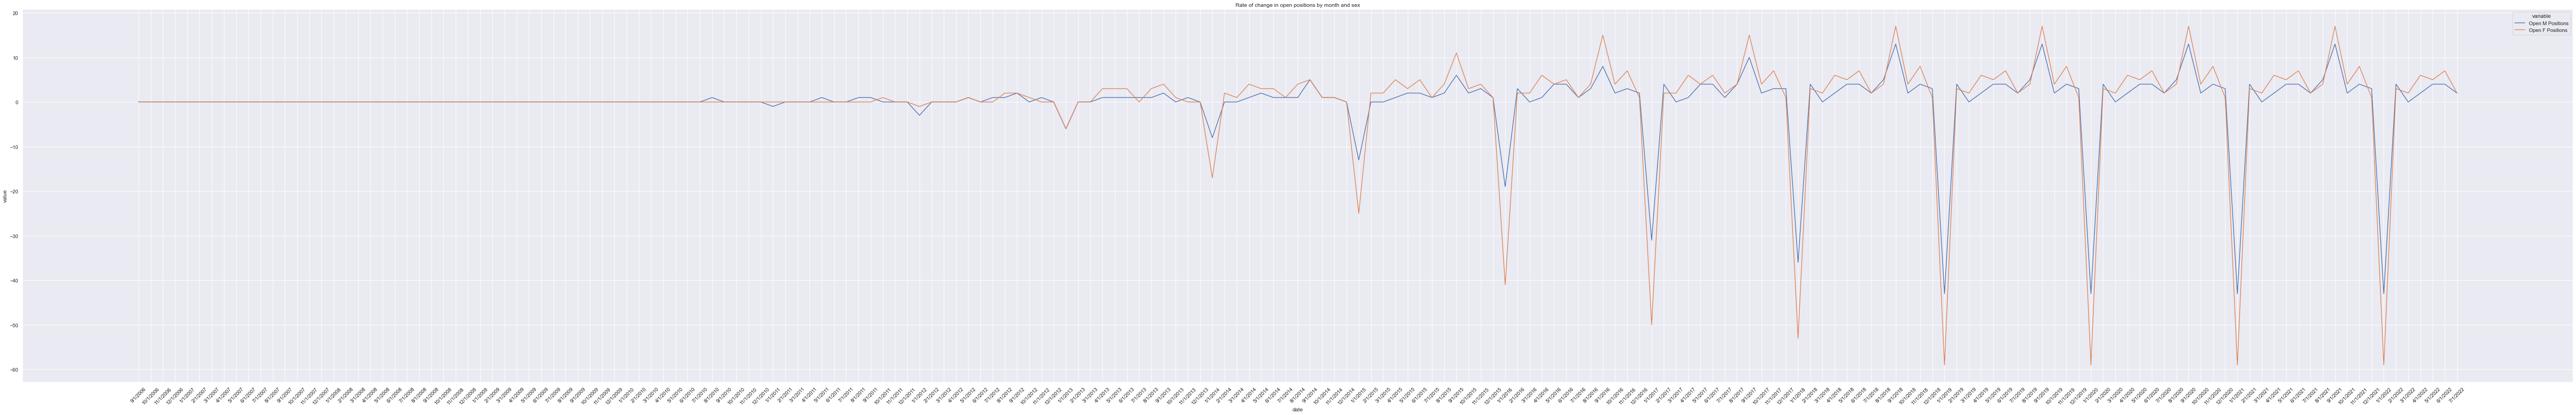

In [205]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=pd.melt(positions_df[["date","Open M Positions","Open F Positions"]],["date"]))
plt.xticks(rotation=45)
plt.title("Rate of change in open positions by month and sex")
plt.show()

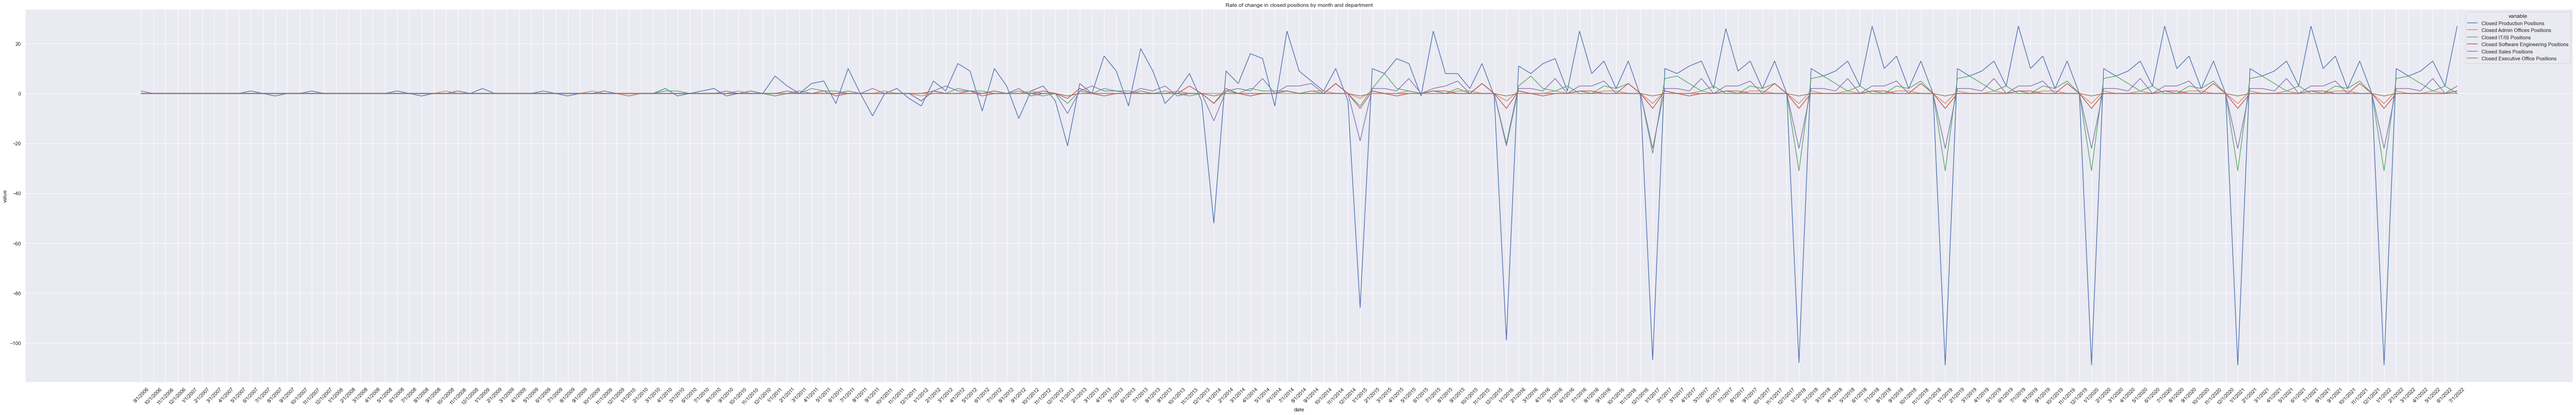

In [206]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(positions_df[["date","Closed Production Positions","Closed Admin Offices Positions","Closed IT/IS Positions",
                                "Closed Software Engineering Positions","Closed Sales Positions",
                                "Closed Executive Office Positions"]],["date"]))
plt.xticks(rotation=45)
plt.title("Rate of change in closed positions by month and department")
plt.show()

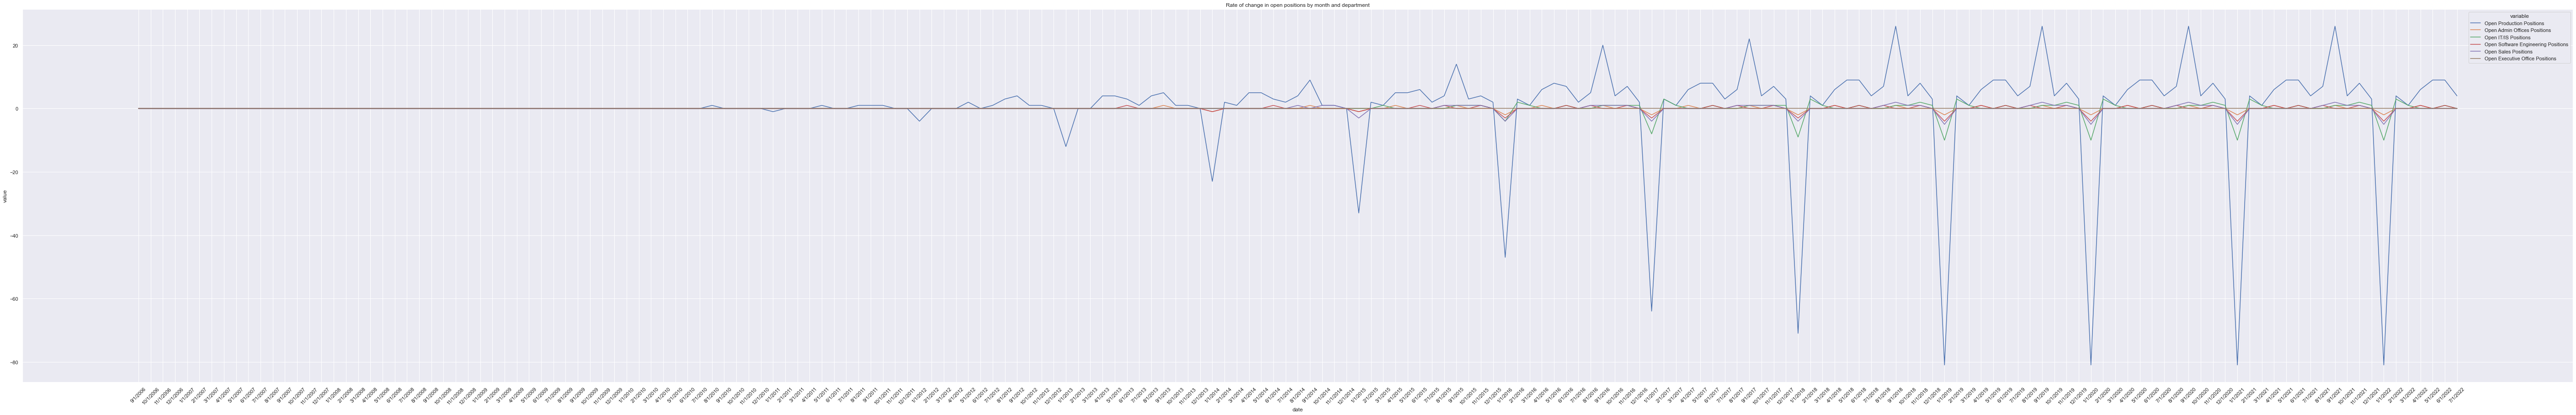

In [207]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(positions_df[["date","Open Production Positions","Open Admin Offices Positions","Open IT/IS Positions",
                                "Open Software Engineering Positions","Open Sales Positions",
                                "Open Executive Office Positions"]],["date"]))
plt.xticks(rotation=45)
plt.title("Rate of change in open positions by month and department")
plt.show()

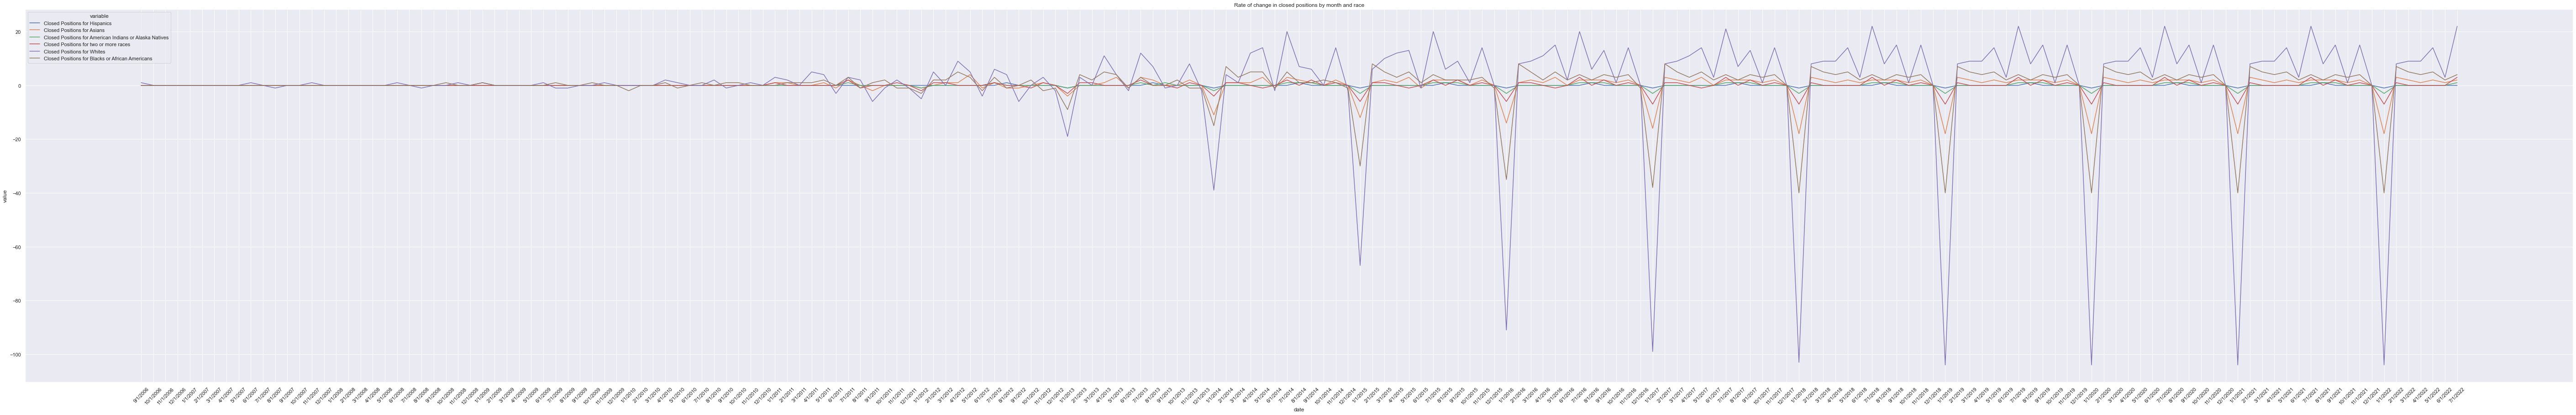

In [208]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(positions_df[["date","Closed Positions for Hispanics","Closed Positions for Asians",
                                "Closed Positions for American Indians or Alaska Natives",
                                "Closed Positions for two or more races","Closed Positions for Whites",
                                "Closed Positions for Blacks or African Americans"]],["date"]))
plt.xticks(rotation=45)
plt.title("Rate of change in closed positions by month and race")
plt.show()

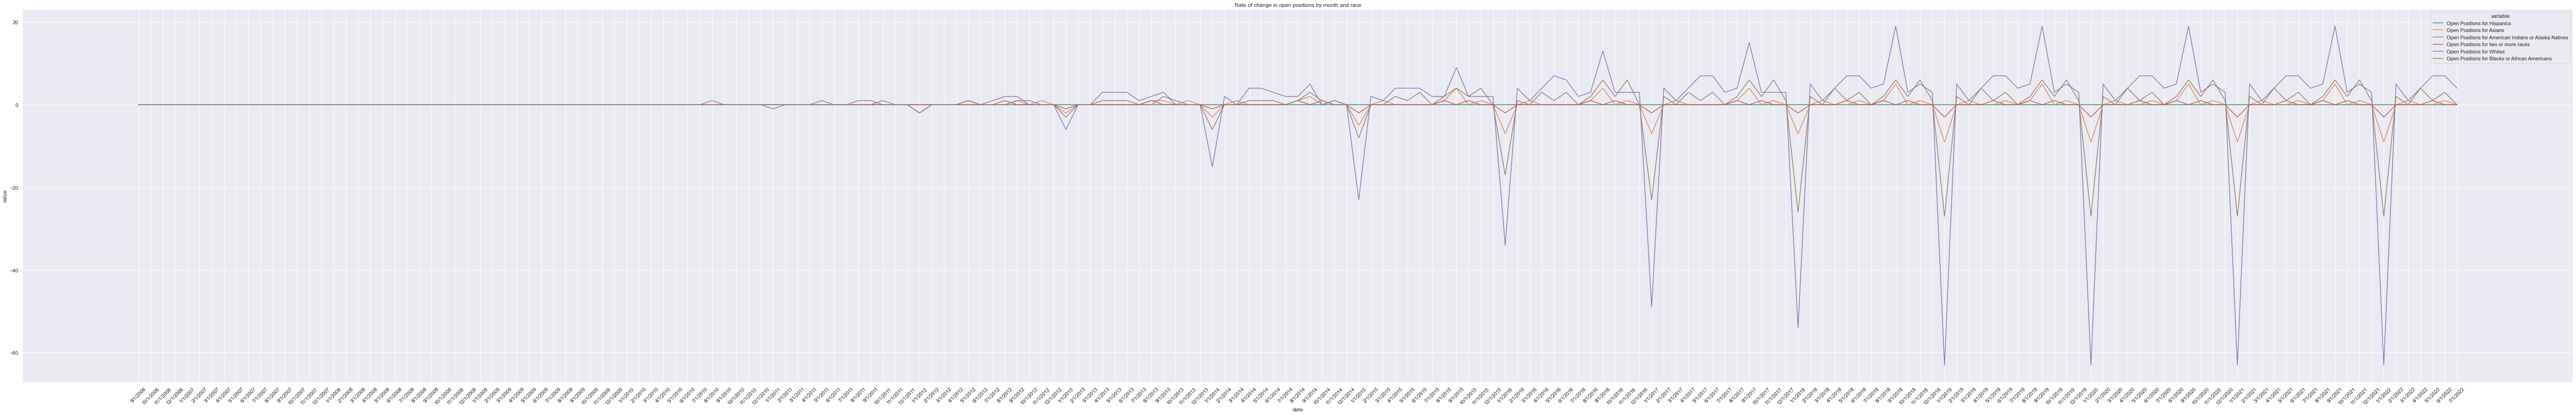

In [209]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(positions_df[["date","Open Positions for Hispanics","Open Positions for Asians",
                                "Open Positions for American Indians or Alaska Natives",
                                "Open Positions for two or more races","Open Positions for Whites",
                                "Open Positions for Blacks or African Americans"]],["date"]))
plt.xticks(rotation=45)
plt.title("Rate of change in open positions by month and race")
plt.show()

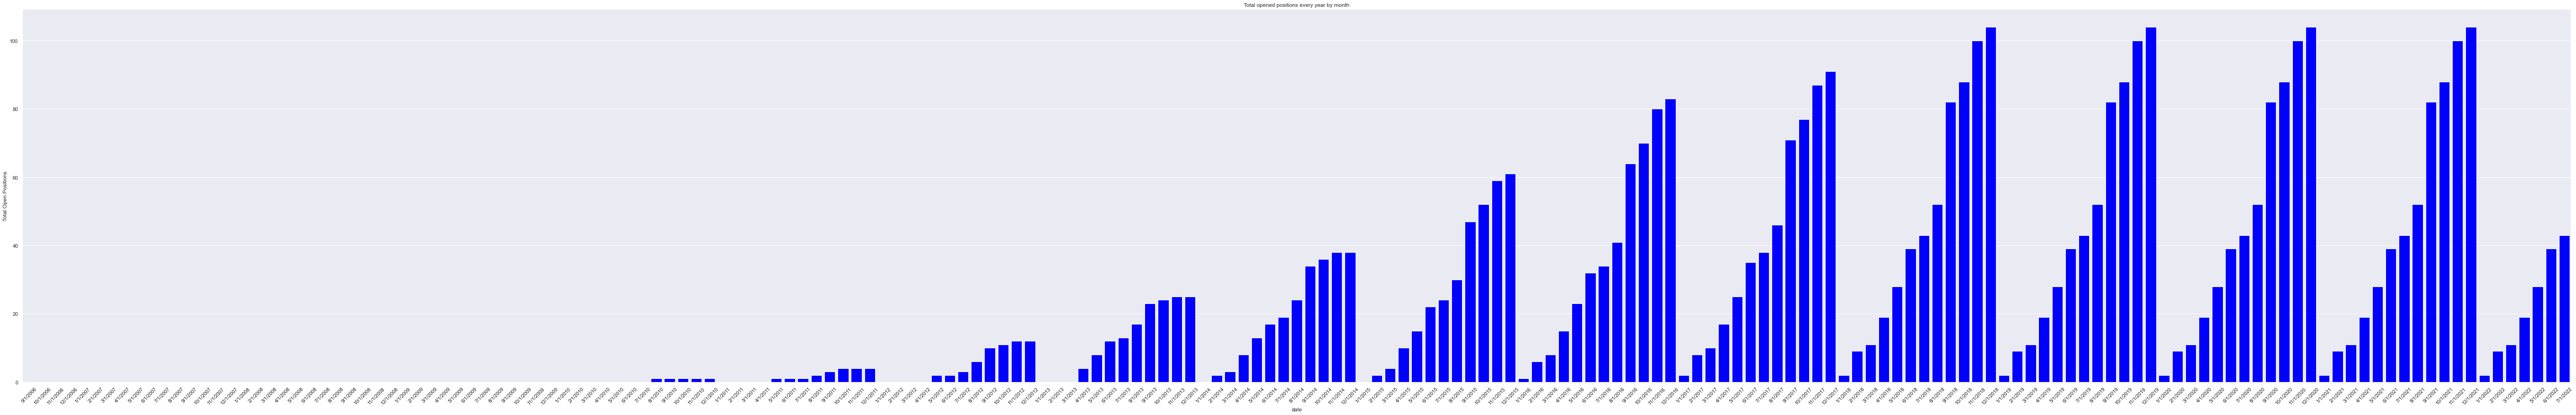

In [210]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="Total Open Positions",facecolor="blue",data=positions_df)
plt.xticks(rotation=45)
plt.title("Total opened positions every year by month")
plt.show()

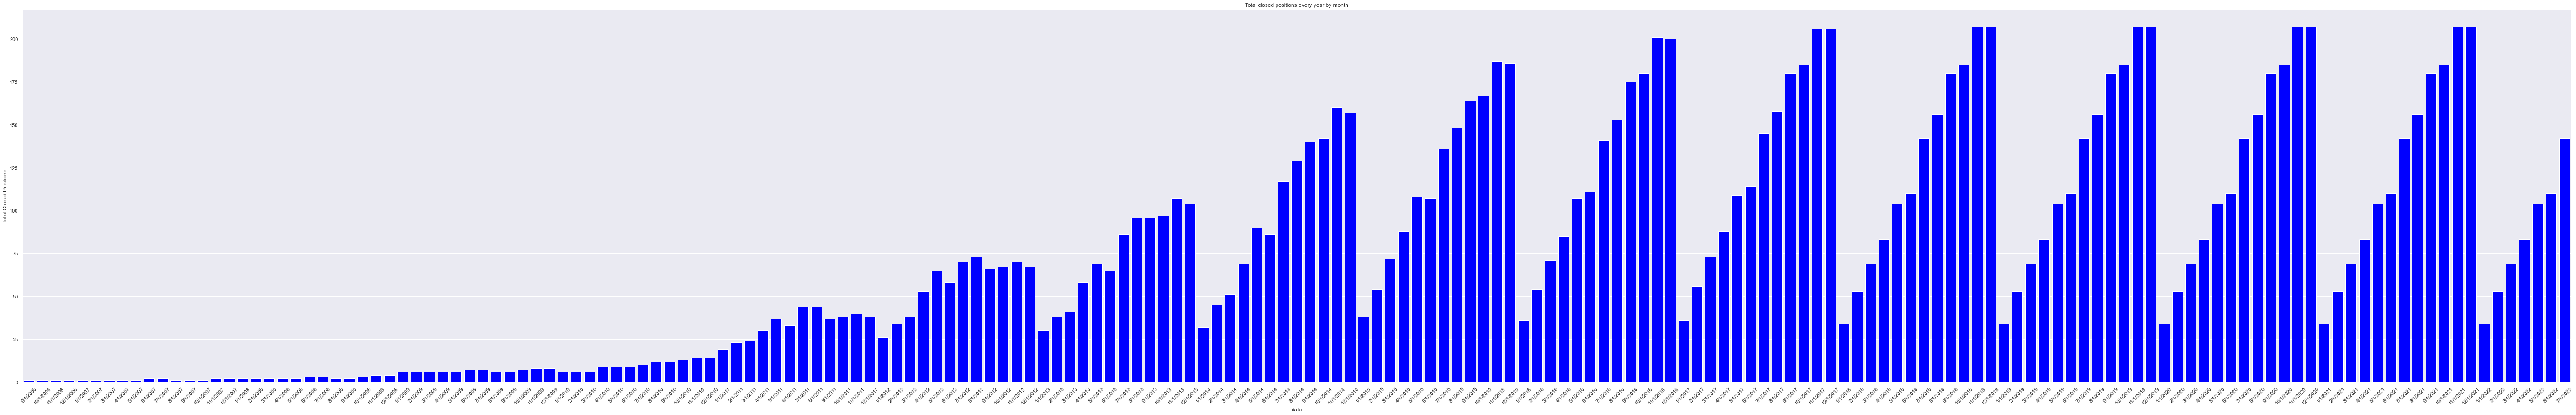

In [211]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="Total Closed Positions",facecolor="blue",data=positions_df)
plt.xticks(rotation=45)
plt.title("Total closed positions every year by month")
plt.show()

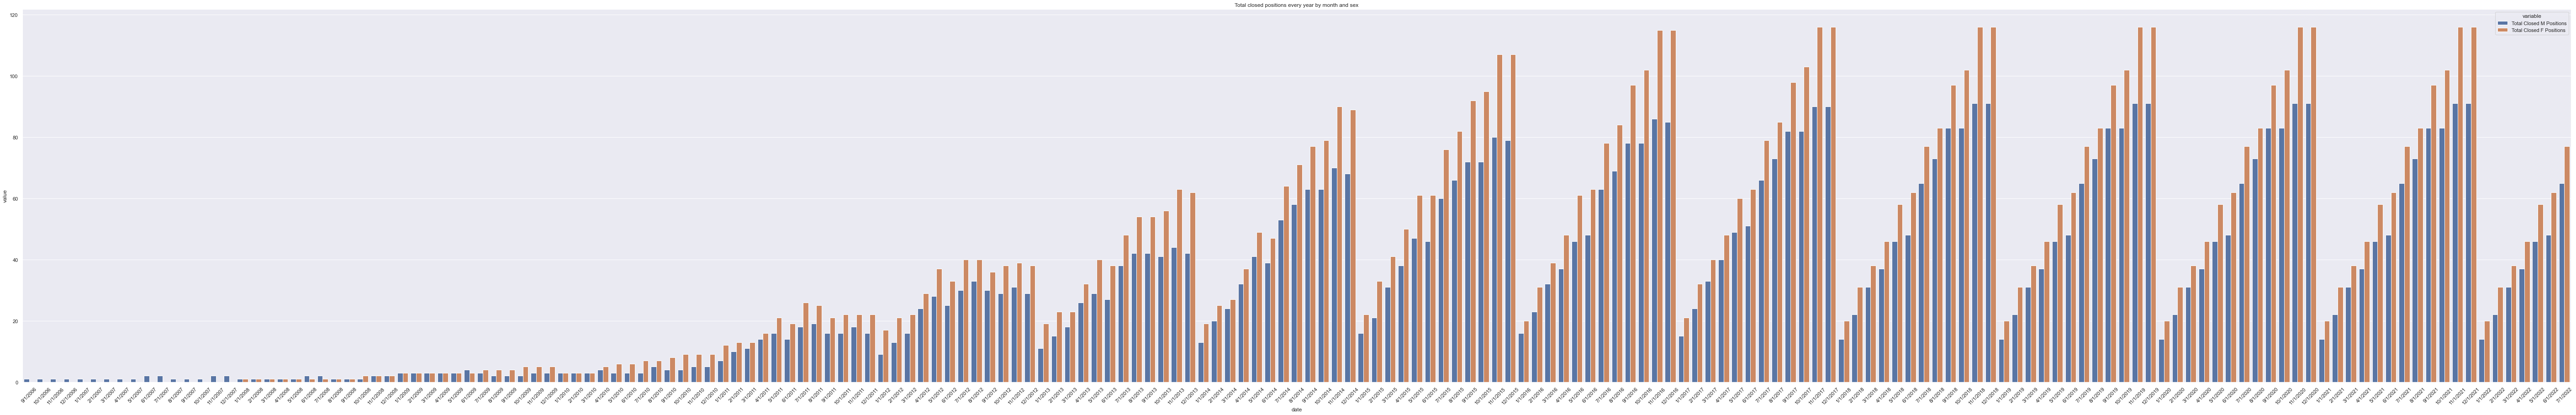

In [212]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="value",hue="variable",data=pd.melt(positions_df[["date","Total Closed M Positions","Total Closed F Positions"]],["date"]))
plt.xticks(rotation=45)
plt.title("Total closed positions every year by month and sex")
plt.show()

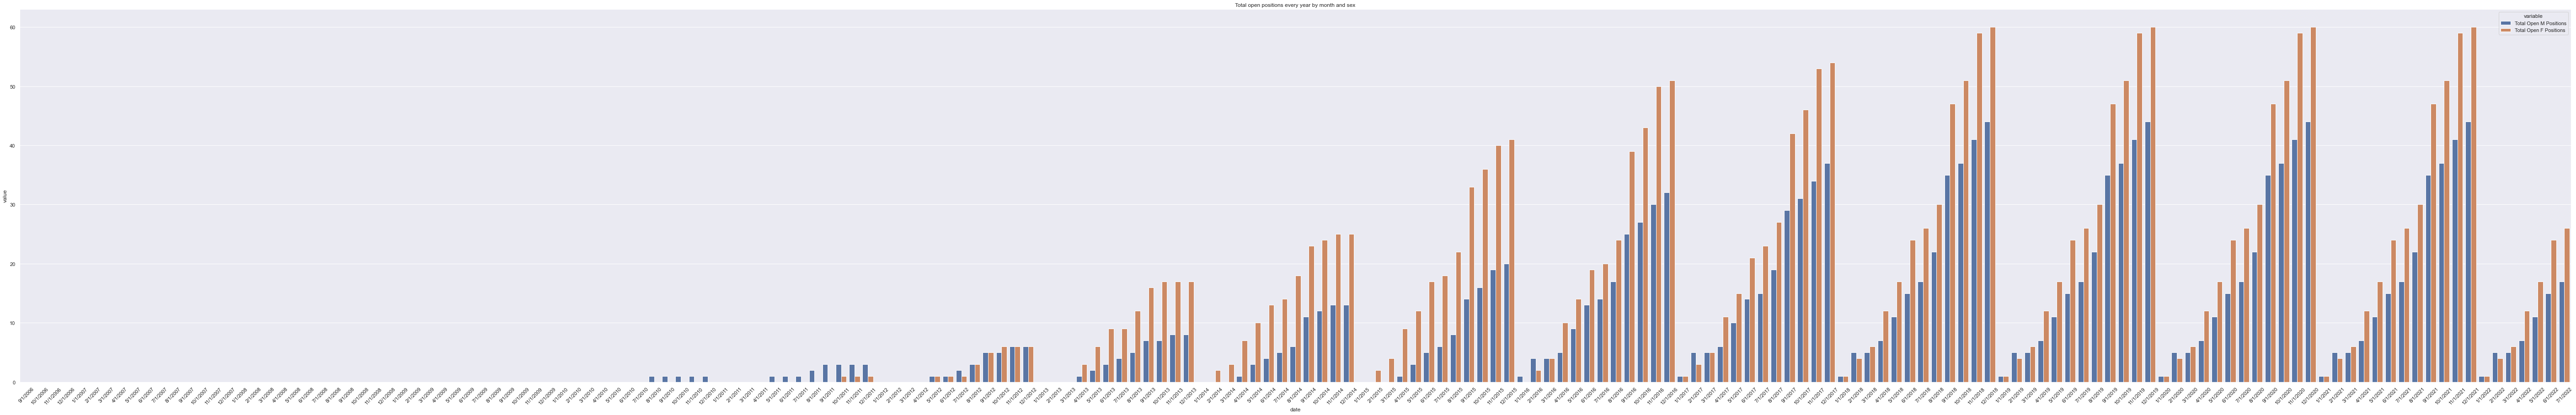

In [213]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="value",hue="variable",data=pd.melt(positions_df[["date","Total Open M Positions","Total Open F Positions"]],["date"]))
plt.xticks(rotation=45)
plt.title("Total open positions every year by month and sex")
plt.show()

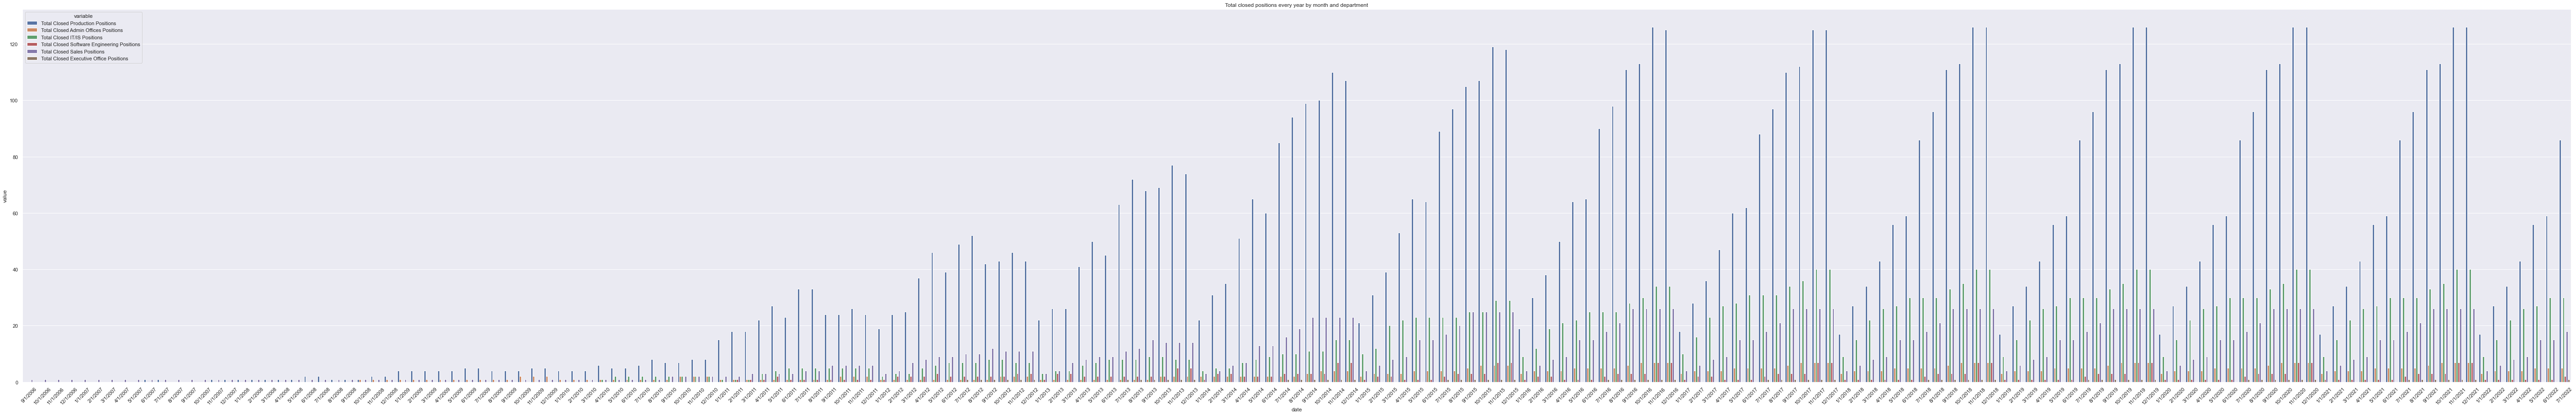

In [214]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="value",hue="variable",data=
            pd.melt(positions_df[["date","Total Closed Production Positions","Total Closed Admin Offices Positions",
                                  "Total Closed IT/IS Positions","Total Closed Software Engineering Positions",
                                  "Total Closed Sales Positions","Total Closed Executive Office Positions"]],["date"])
           )
plt.xticks(rotation=45)
plt.title("Total closed positions every year by month and department")
plt.show()

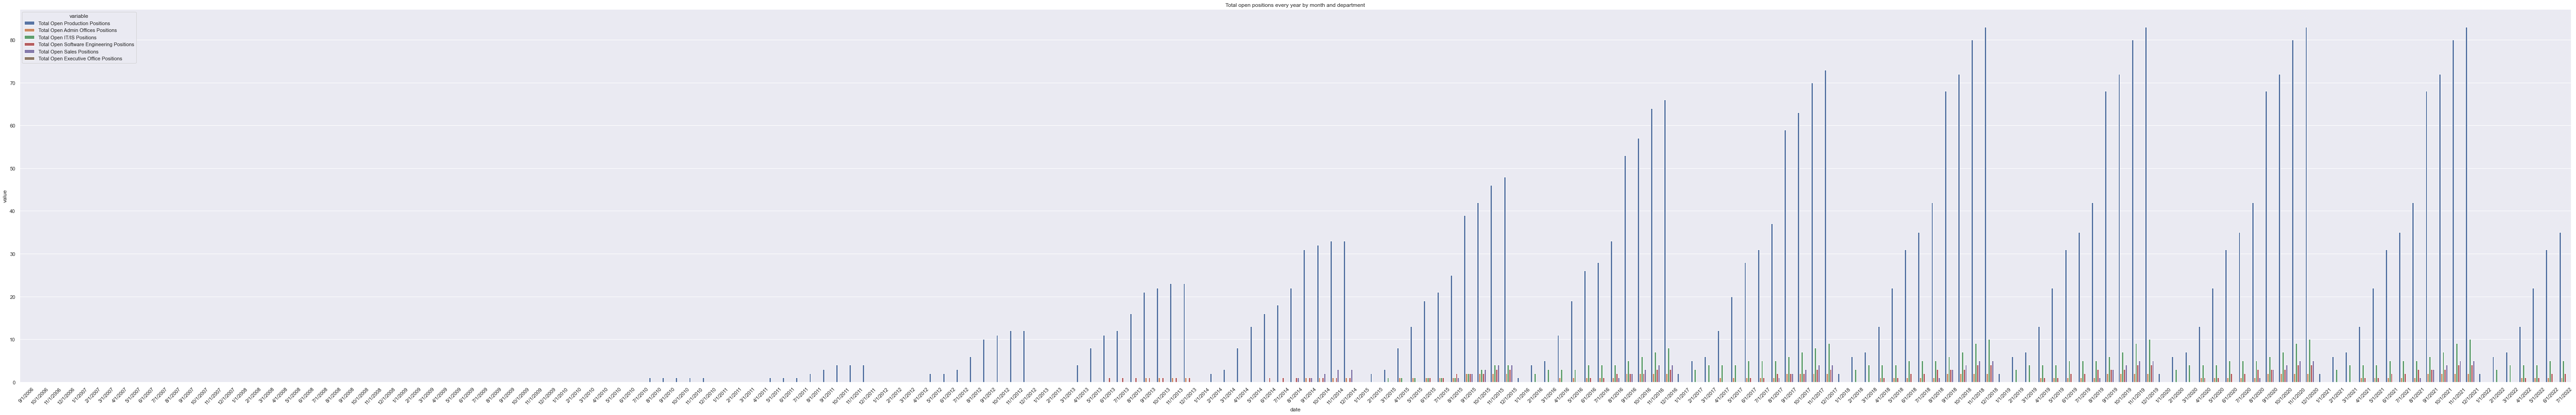

In [215]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="value",hue="variable",data=
            pd.melt(positions_df[["date","Total Open Production Positions","Total Open Admin Offices Positions",
                                  "Total Open IT/IS Positions","Total Open Software Engineering Positions",
                                  "Total Open Sales Positions","Total Open Executive Office Positions"]],["date"])
           )
plt.xticks(rotation=45)
plt.title("Total open positions every year by month and department")
plt.show()

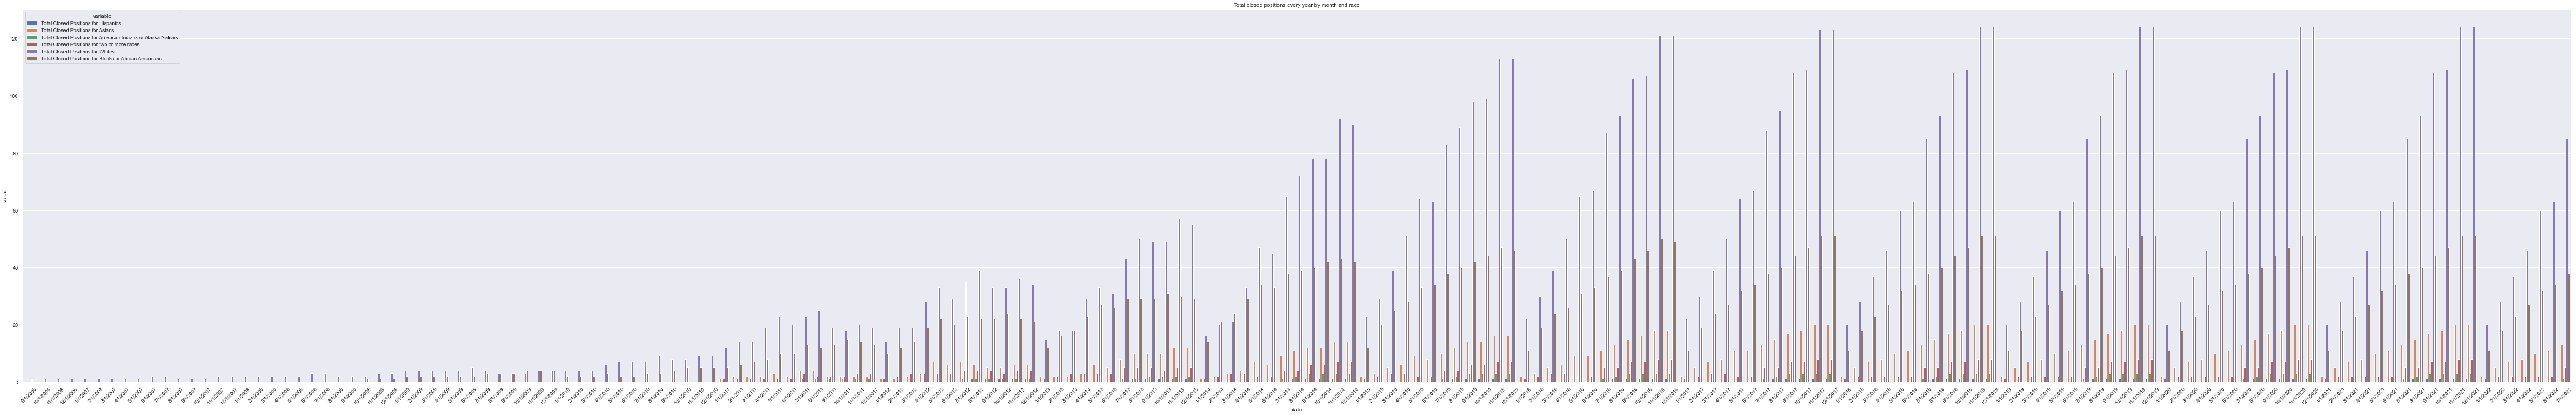

In [216]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="value",hue="variable",data=
            pd.melt(positions_df[["date","Total Closed Positions for Hispanics","Total Closed Positions for Asians",
                                "Total Closed Positions for American Indians or Alaska Natives",
                                "Total Closed Positions for two or more races","Total Closed Positions for Whites",
                                "Total Closed Positions for Blacks or African Americans"]],["date"])
           )
plt.xticks(rotation=45)
plt.title("Total closed positions every year by month and race")
plt.show()

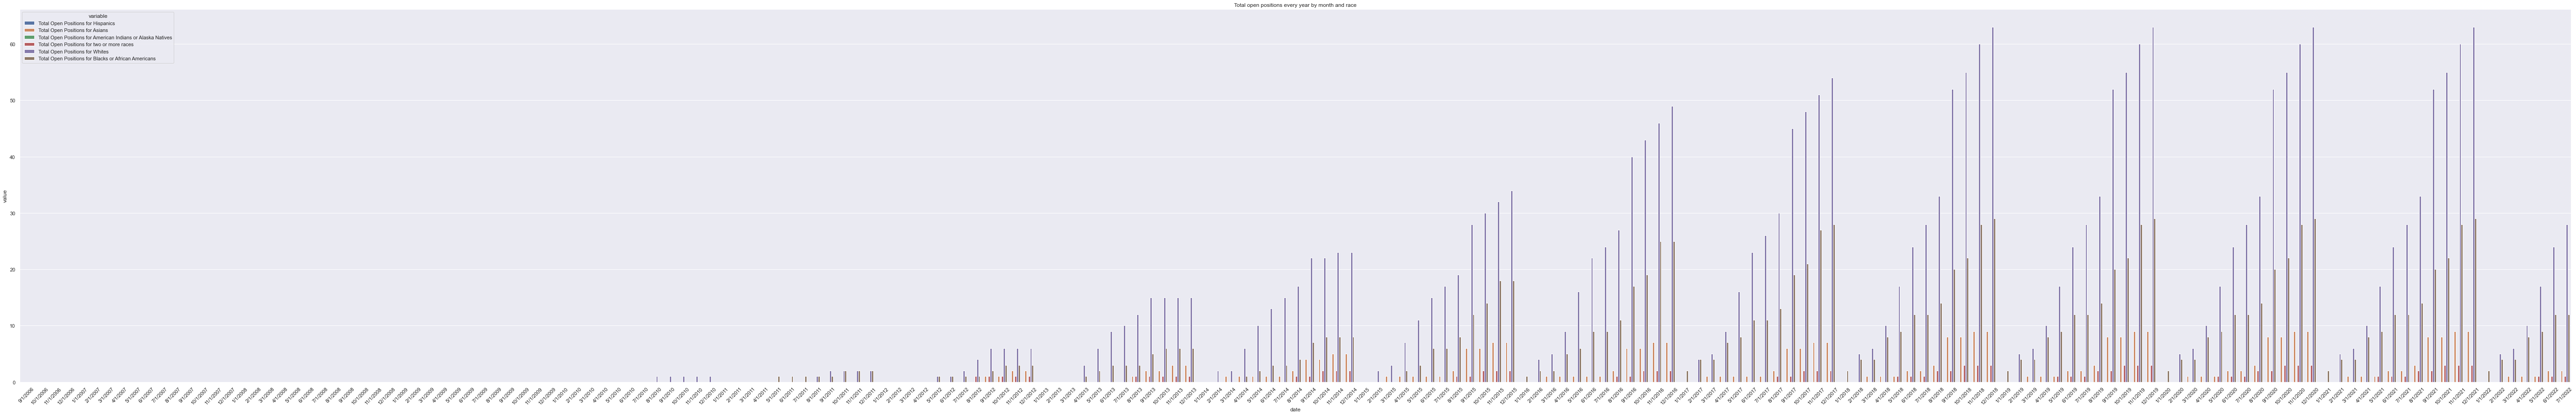

In [217]:
sns.set(rc={"figure.figsize":(100,15)})
sns.barplot(x="date",y="value",hue="variable",data=
            pd.melt(positions_df[["date","Total Open Positions for Hispanics","Total Open Positions for Asians",
                                "Total Open Positions for American Indians or Alaska Natives",
                                "Total Open Positions for two or more races","Total Open Positions for Whites",
                                "Total Open Positions for Blacks or African Americans"]],["date"])
           )
plt.xticks(rotation=45)
plt.title("Total open positions every year by month and race")
plt.show()

In [218]:
###############
#Employee turnover
#############

#turnover=employees that left during that month/total number of active employees
active_df["Turnover"]=[100*c1/c2 for c1,c2 in zip(active_df["Left"],active_df["Active"])]
active_df["Turnover F"]=[100*c1/c2 if c2!=0 else None for c1,c2 in zip(active_df["Left F"],active_df["Active F"])]
active_df["Turnover M"]=[100*c1/c2 if c2!=0 else None for c1,c2 in zip(active_df["Left M"],active_df["Active M"])]

active_df["Turnover Production"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Production"],active_df["Active Production"])]
active_df["Turnover Admin Offices"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Admin Offices"],active_df["Active Admin Offices"])]
active_df["Turnover IT/IS"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left IT/IS"],active_df["Active IT/IS"])]
active_df["Turnover Software Engineering"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Software Engineering"],active_df["Active Software Engineering"])]
active_df["Turnover Sales"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Sales"],active_df["Active Sales"])]
active_df["Turnover Executive Office"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Executive Office"],active_df["Active Executive Office"])]
active_df["Turnover Hispanic"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Hispanic"],active_df["Active Hispanic"])]
active_df["Turnover Asian"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left Asian"],active_df["Active Asian"])]
active_df["Turnover American Indian or Alaska Native"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left American Indian or Alaska Native"],
                                                   active_df["Active American Indian or Alaska Native"])]
active_df["Turnover two or more races"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left two or more races"],
                                                   active_df["Active two or more races"])]
active_df["Turnover white"]=[100*c1/c2 if c2!=0 else None for c1,c2 in zip(active_df["Left white"],active_df["Active white"])]
active_df["Turnover black or African American"]=[100*c1/c2 if c2!=0 else None 
                                  for c1,c2 in zip(active_df["Left black or African American"],
                                                   active_df["Active black or African American"])]



active_df.tail()

date  Active  Left  Active F  Left F  Active M  Left M  \
186  3/1/2022      58     2        32       6        26       5   
187  4/1/2022      64     8        34      12        30       7   
188  5/1/2022      76     9        41      17        35      11   
189  6/1/2022      71    11        38      24        33      15   
190  7/1/2022      99     4        51      26        48      17   

     Active Production  Left Production  Active Admin Offices  ...  \
186                 27                7                     4  ...   
187                 30               13                     3  ...   
188                 34               22                     4  ...   
189                 28               31                     4  ...   
190                 51               35                     4  ...   

     Turnover IT/IS  Turnover Software Engineering  Turnover Sales  \
186       22.222222                            0.0             0.0   
187       18.181818                            NaN             0.0   
188       17.391304                            NaN             0.0   
189       20.000000                         -200.0             0.0   
190       20.000000                            NaN             0.0   

     Turnover Executive Office  Turnover Hispanic  Turnover Asian  \
186                        NaN                NaN       16.666667   
187                        NaN                NaN       14.285714   
188                        NaN                NaN       11.111111   
189                        NaN                NaN       22.222222   
190                        0.0                NaN       18.181818   

     Turnover American Indian or Alaska Native  Turnover two or more races  \
186                                        NaN                         0.0   
187                                        NaN                         0.0   
188                                        NaN                       100.0   
189                                        NaN                       100.0   
190                                        0.0                        25.0   

     Turnover white  Turnover black or African American  
186       19.354839                           21.052632  
187       27.777778                           42.105263  
188       39.534884                           39.130435  
189       61.538462                           54.545455  
190       49.122807                           46.153846  

[5 rows x 46 columns]

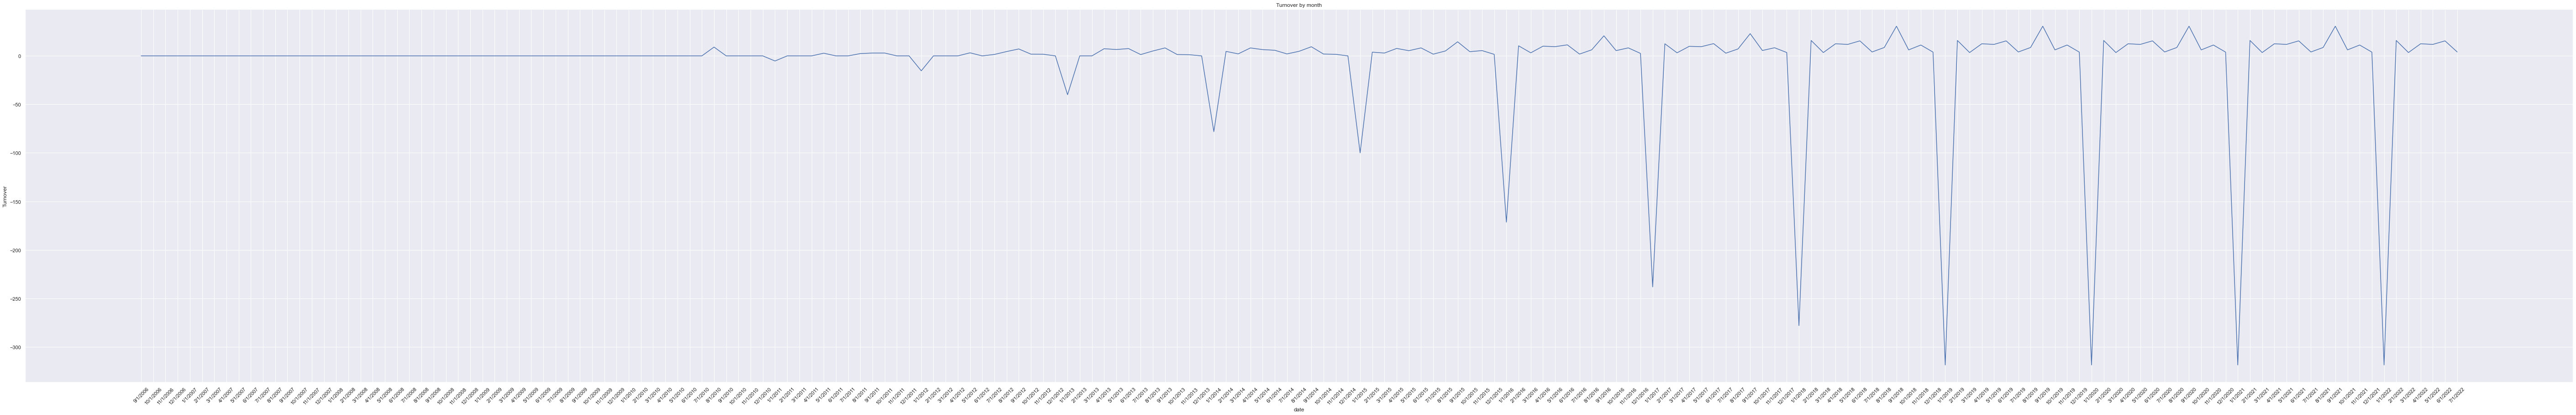

In [224]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="Turnover",data=active_df)
plt.xticks(rotation=45)
plt.title("Turnover by month")
plt.show()

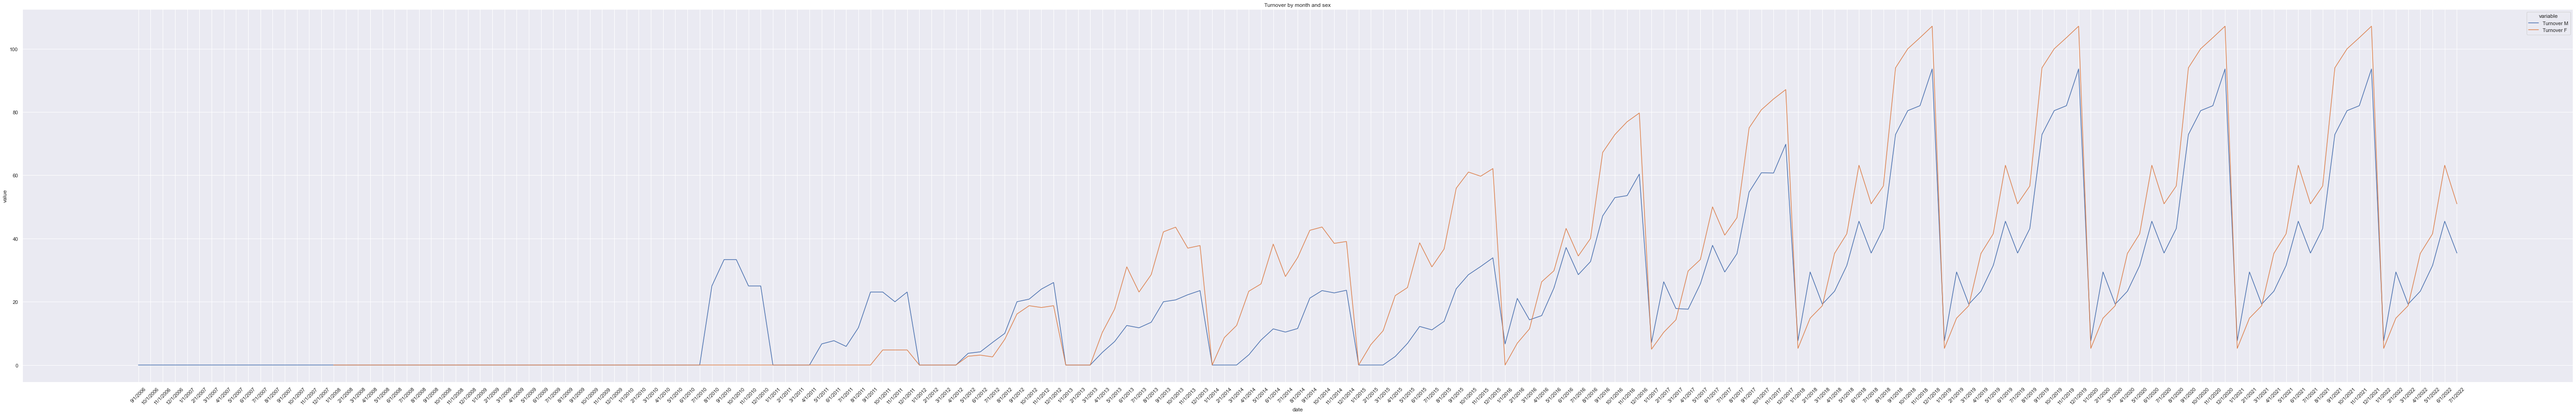

In [225]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=pd.melt(active_df[["date","Turnover M","Turnover F"]],["date"]))
plt.xticks(rotation=45)
plt.title("Turnover by month and sex")
plt.show()

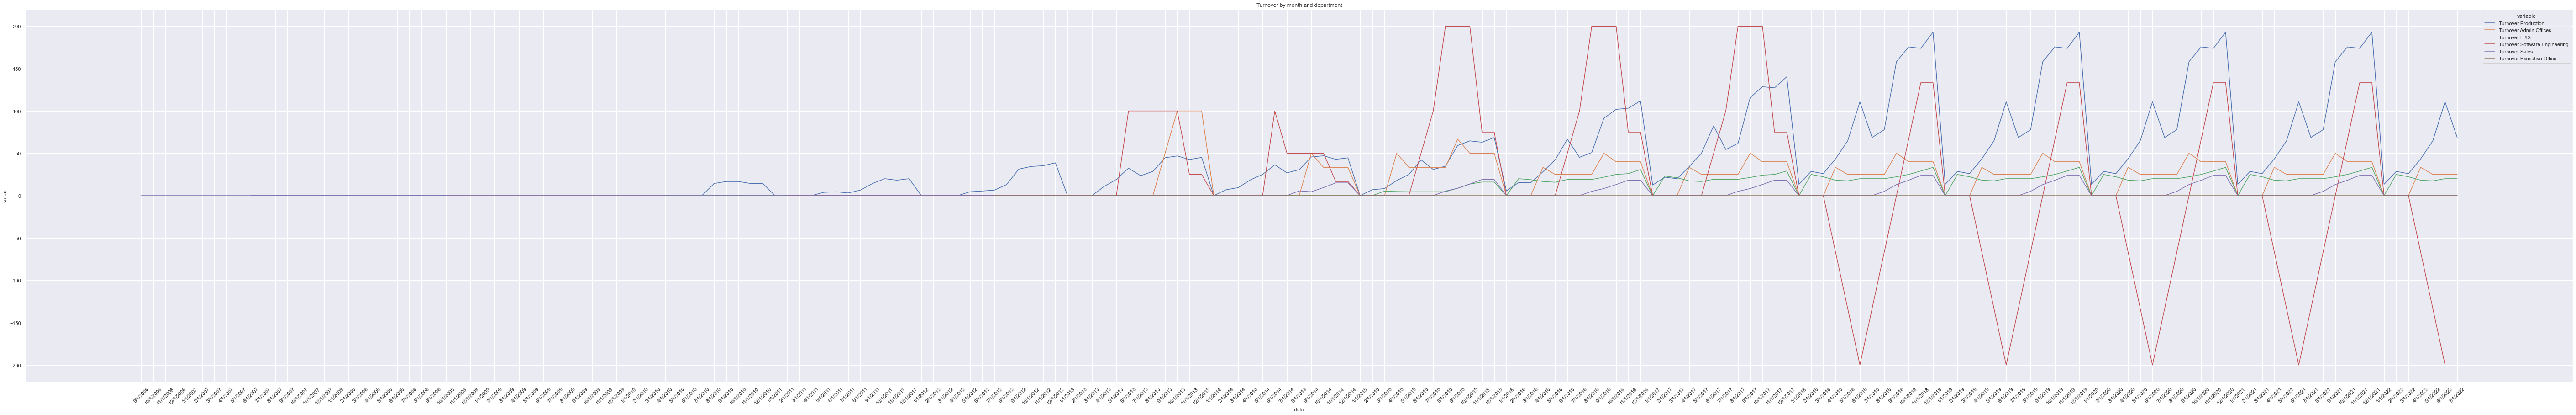

In [226]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(active_df[["date","Turnover Production","Turnover Admin Offices","Turnover IT/IS",
                               "Turnover Software Engineering","Turnover Sales","Turnover Executive Office"]],["date"]))
plt.xticks(rotation=45)
plt.title("Turnover by month and department")
plt.show()

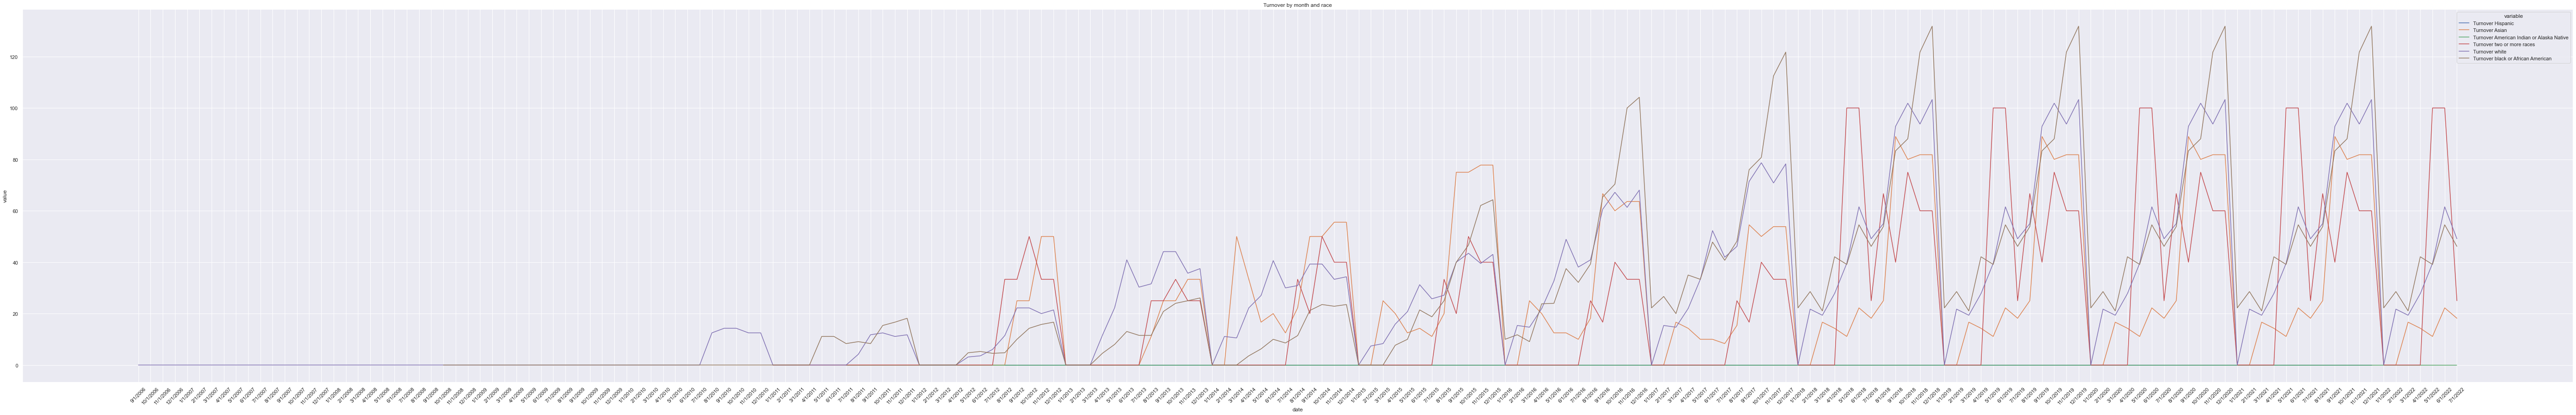

In [227]:
sns.set(rc={"figure.figsize":(100,15)})
sns.lineplot(x="date",y="value",hue="variable",data=
             pd.melt(active_df[["date","Turnover Hispanic","Turnover Asian","Turnover American Indian or Alaska Native",
                               "Turnover two or more races","Turnover white","Turnover black or African American"]],["date"]))
plt.xticks(rotation=45)
plt.title("Turnover by month and race")
plt.show()